## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

path_drive='/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T03'

Mounted at /content/gdrive/


## Database: BloodMNIST




### Connect with database

In [3]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cach

In [4]:
from medmnist import BloodMNIST, INFO, Evaluator

### Collect specific dataset to train, test and validation

In [5]:
# distinct labels classifications
dict_classes= {
  '0': 'basophil',
  '1': 'eosinophil',
  '2': 'erythroblast',
  '3': 'immature granulocytes',
  '4': 'lymphocyte',
  '5': 'monocyte',
  '6': 'neutrophil',
  '7': 'platelet'
 }

In [6]:
size_dimension= 28

data_train= BloodMNIST(split="train", download=True, size=size_dimension)
data_val=   BloodMNIST(split="val", download=True, size=size_dimension)
data_test=  BloodMNIST(split="test", download=True, size=size_dimension)

100%|██████████| 35461855/35461855 [00:02<00:00, 16511437.21it/s]


Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


In [7]:
## split the datasets
X_train, y_train= data_train.imgs, data_train.labels
X_val, y_val= data_val.imgs, data_val.labels
X_test, y_test= data_test.imgs, data_test.labels

In [8]:
# Reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], size_dimension, size_dimension, 3)
X_val = X_val.reshape(X_val.shape[0], size_dimension, size_dimension, 3)
X_test = X_test.reshape(X_test.shape[0], size_dimension, size_dimension, 3)

In [9]:
y_train = y_train.flatten()
y_val = y_val.flatten()
y_test = y_test.flatten()

### Visualizing the actual data

In [ ]:
# y_train.replace(dict_classes)
print(y_train.ravel())
a= [dict_classes[str(i)] for i in y_train.ravel()]
print(a)

[7 3 6 ... 1 6 4]
['platelet', 'immature granulocytes', 'neutrophil', 'neutrophil', 'platelet', 'neutrophil', 'erythroblast', 'erythroblast', 'platelet', 'erythroblast', 'eosinophil', 'eosinophil', 'neutrophil', 'platelet', 'neutrophil', 'immature granulocytes', 'platelet', 'erythroblast', 'neutrophil', 'eosinophil', 'neutrophil', 'eosinophil', 'monocyte', 'monocyte', 'platelet', 'platelet', 'basophil', 'neutrophil', 'lymphocyte', 'monocyte', 'immature granulocytes', 'erythroblast', 'eosinophil', 'eosinophil', 'neutrophil', 'neutrophil', 'eosinophil', 'lymphocyte', 'basophil', 'lymphocyte', 'neutrophil', 'immature granulocytes', 'basophil', 'eosinophil', 'eosinophil', 'monocyte', 'immature granulocytes', 'basophil', 'immature granulocytes', 'monocyte', 'eosinophil', 'platelet', 'lymphocyte', 'lymphocyte', 'eosinophil', 'platelet', 'neutrophil', 'neutrophil', 'erythroblast', 'eosinophil', 'neutrophil', 'lymphocyte', 'lymphocyte', 'immature granulocytes', 'monocyte', 'eosinophil', 'immat

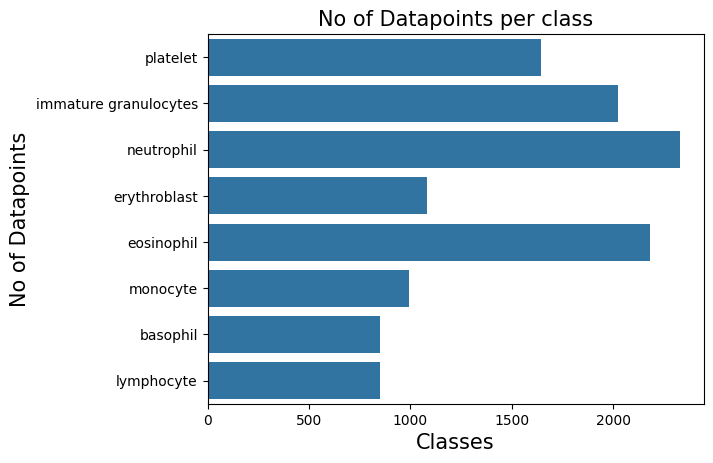

In [ ]:
plt.title('No of Datapoints per class', fontsize=15)
sns.countplot(a)
plt.xlabel('Classes', fontsize=15)
plt.ylabel('No of Datapoints', fontsize=15)
plt.xticks()
plt.savefig(f'{path_drive}/NDatapointsPerClass.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/NDatapointsPerClass.png', format='png', bbox_inches="tight")
plt.show()

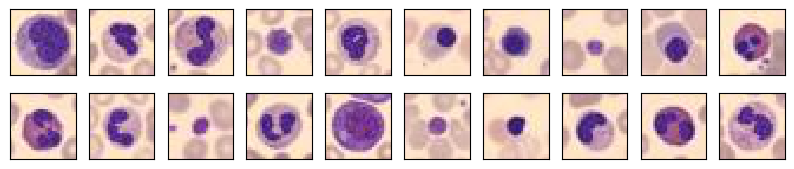

In [ ]:
# Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(10, 2))
# plt.title('Original Train Images', fontsize=15)
ind = 1
for i in range(1, 3, 1):
    for j in range(1, 11, 1):
        fig.add_subplot(2, 10, ind)
        plt.imshow(X_train[ind], interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1
# plt.set_axis_off()
plt.savefig(f'{path_drive}/fig_train_images.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/fig_train_images.png', format='png', bbox_inches="tight")
plt.show()

## Model

## Functions and Definitions

In [11]:
def setup_CNN_model(units=1024, drop_out=0, batch_size=64, epochs=5, n=1,
                    algorithm='sparse_categorical_crossentropy',
                    qtd_kernel=15, height_k=3, width_k=3, activation='relu'):
  model = tf.keras.models.Sequential()

  print(f'kernel=({height_k},{width_k}), {qtd_kernel} filters kernel \n algorithm {algorithm}, option algorithm (1) loss and (2) optimizer = {n}')
  print(f'Dropout={drop_out}, Batch_size={batch_size}, Epochs={epochs}')

  model.add(tf.keras.layers.Conv2D(qtd_kernel, kernel_size=(height_k, width_k),
                                   activation='relu', input_shape=(28, 28, 3)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(85, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.Dense(8, activation='softmax'))

  ## there are 13 classes of optimizer ways to compilate
  ## there are 21 classes of loss, only 13 could be applied
  ## there are XX classes of metrics
  if n==1:
    model.compile(optimizer='adam',
                  loss=algorithm,
                  metrics=['accuracy'])
  else:
    model.compile(optimizer=algorithm,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size)

  # present the structure of model initialized
  model.summary()

  # Evaluate the model on the test data
  print("Evaluate on test data")
  results = model.evaluate(X_test, y_test)

  print("test loss, test acc:", results)

  # Save the informations in local drive folder
  model_json = model.to_json()
  dir_path = f'{path_drive}/CNN'
  name_file= f'/model_n{n}_algorithm_{algorithm}_{units}_units_{drop_out}_drop_out_{batch_size}_batch_size_{epochs}_epocs'
  json_file = open(f'{dir_path}/JSON/{name_file}.json', "w")
  json_file.write(model_json)
  json_file.close()
  model.save_weights(f'{name_file}.h5')

  print("Model saved to disk")

  return results, model, history

### Creation of Confusion Matrix

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_conf_matrix(y_test=[], pred_lr=[], title="Logistic Regression (newton-cg)", show_plot=True, cm=[],  details="", path_compl="" ):
  # Get the confusion matrix
  if len(cm) == 0:
    cm = confusion_matrix(y_test, pred_mlp2.flatten())

  class_names = ['basophil', 'eosinophil', 'erythroblast', 'immature granulocytes', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']

  # Create a heatmap of the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)

  # Add labels and title
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("Actual", fontsize=14)
  plt.title(f'Confusion Matrix for {title}', fontsize=16)

  # Save the plot
  plt.savefig(f'{path_drive}/CNN/{path_compl}_fig_cm_{details}.eps', format='eps', bbox_inches="tight")
  plt.savefig(f'{path_drive}/CNN/{path_compl}_fig_cm_{details}.png', format='png', bbox_inches="tight")

  # Show the plot
  if show_plot:
    plt.show()

In [ ]:
pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "MLP", show_plot=False, cm=cm2, details="" )

NameError: name 'ret_model' is not defined

### Drafts of setup Model

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(1024, 0, 64, 5, 1, "sparse_categorical_crossentropy", 15, 3, 3, 'relu')

kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=5
Epoch 1/5
187/187 [==============================] - 9s 41ms/step - loss: 9.9071 - accuracy: 0.1887 - val_loss: 1.9798 - val_accuracy: 0.2027
Epoch 2/5
187/187 [==============================] - 5s 27ms/step - loss: 1.7625 - accuracy: 0.3447 - val_loss: 1.5331 - val_accuracy: 0.4644
Epoch 3/5
187/187 [==============================] - 5s 29ms/step - loss: 1.5860 - accuracy: 0.4198 - val_loss: 1.4384 - val_accuracy: 0.4352
Epoch 4/5
187/187 [==============================] - 7s 38ms/step - loss: 1.4741 - accuracy: 0.4510 - val_loss: 1.3599 - val_accuracy: 0.5350
Epoch 5/5
187/187 [==============================] - 5s 28ms/step - loss: 1.4113 - accuracy: 0.4916 - val_loss: 1.2721 - val_accuracy: 0.5350
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape   

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(512, 0, 64, 5, 1, "sparse_categorical_crossentropy", 15, 3, 3, 'relu')

kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=5
Epoch 1/5
187/187 [==============================] - 12s 43ms/step - loss: 12.8050 - accuracy: 0.1922 - val_loss: 2.0466 - val_accuracy: 0.1945
Epoch 2/5
187/187 [==============================] - 8s 41ms/step - loss: 2.0346 - accuracy: 0.1947 - val_loss: 2.0241 - val_accuracy: 0.1945
Epoch 3/5
187/187 [==============================] - 5s 28ms/step - loss: 2.0178 - accuracy: 0.1947 - val_loss: 2.0127 - val_accuracy: 0.1945
Epoch 4/5
187/187 [==============================] - 6s 31ms/step - loss: 2.0095 - accuracy: 0.1948 - val_loss: 2.0075 - val_accuracy: 0.1945
Epoch 5/5
187/187 [==============================] - 9s 47ms/step - loss: 2.0058 - accuracy: 0.1948 - val_loss: 2.0050 - val_accuracy: 0.1945
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shap

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(1024, 0, 64, 15, 1, "sparse_categorical_crossentropy", 15, 3, 3, 'relu')

kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 10s 44ms/step - loss: 7.5397 - accuracy: 0.4163 - val_loss: 0.9378 - val_accuracy: 0.6723
Epoch 2/15
187/187 [==============================] - 8s 41ms/step - loss: 0.9675 - accuracy: 0.6625 - val_loss: 0.6319 - val_accuracy: 0.7716
Epoch 3/15
187/187 [==============================] - 12s 66ms/step - loss: 0.7777 - accuracy: 0.7169 - val_loss: 0.5803 - val_accuracy: 0.7734
Epoch 4/15
187/187 [==============================] - 13s 68ms/step - loss: 0.6893 - accuracy: 0.7459 - val_loss: 0.5392 - val_accuracy: 0.7792
Epoch 5/15
187/187 [==============================] - 8s 44ms/step - loss: 0.6381 - accuracy: 0.7690 - val_loss: 0.4660 - val_accuracy: 0.8224
Epoch 6/15
187/187 [==============================] - 6s 30ms/step - loss: 0.6009 - accuracy: 0.7823 - val_loss: 0.5102 -

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(512, 0, 64, 15, 1, "sparse_categorical_crossentropy", 15, 3, 3, 'relu')

kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 11s 52ms/step - loss: 7.1413 - accuracy: 0.1877 - val_loss: 2.0477 - val_accuracy: 0.1945
Epoch 2/15
187/187 [==============================] - 9s 51ms/step - loss: 2.0360 - accuracy: 0.1948 - val_loss: 2.0245 - val_accuracy: 0.1945
Epoch 3/15
187/187 [==============================] - 10s 53ms/step - loss: 2.0179 - accuracy: 0.1948 - val_loss: 2.0129 - val_accuracy: 0.1945
Epoch 4/15
187/187 [==============================] - 9s 47ms/step - loss: 2.0116 - accuracy: 0.1948 - val_loss: 2.0074 - val_accuracy: 0.1945
Epoch 5/15
187/187 [==============================] - 10s 54ms/step - loss: 2.0071 - accuracy: 0.1949 - val_loss: 2.0050 - val_accuracy: 0.1945
Epoch 6/15
187/187 [==============================] - 8s 40ms/step - loss: 2.0042 - accuracy: 0.1948 - val_loss: 2.0041 -

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(2048, 0, 64, 15, 1, "sparse_categorical_crossentropy", 15, 3, 3, 'relu')

kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 6s 29ms/step - loss: 5.2606 - accuracy: 0.4510 - val_loss: 0.9615 - val_accuracy: 0.6741
Epoch 2/15
187/187 [==============================] - 8s 41ms/step - loss: 1.0045 - accuracy: 0.6578 - val_loss: 0.6654 - val_accuracy: 0.7617
Epoch 3/15
187/187 [==============================] - 5s 27ms/step - loss: 0.7994 - accuracy: 0.7198 - val_loss: 0.6013 - val_accuracy: 0.7786
Epoch 4/15
187/187 [==============================] - 7s 36ms/step - loss: 0.7161 - accuracy: 0.7409 - val_loss: 0.5315 - val_accuracy: 0.8002
Epoch 5/15
187/187 [==============================] - 10s 55ms/step - loss: 0.6143 - accuracy: 0.7731 - val_loss: 0.4770 - val_accuracy: 0.8277
Epoch 6/15
187/187 [==============================] - 6s 31ms/step - loss: 0.5790 - accuracy: 0.7881 - val_loss: 0.5119 - v

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(3096, 0, 64, 15, 1, "sparse_categorical_crossentropy", 15, 3, 3, 'relu')

kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 12s 60ms/step - loss: 13.7241 - accuracy: 0.1892 - val_loss: 2.0521 - val_accuracy: 0.1945
Epoch 2/15
187/187 [==============================] - 8s 44ms/step - loss: 2.0422 - accuracy: 0.1949 - val_loss: 2.0284 - val_accuracy: 0.1945
Epoch 3/15
187/187 [==============================] - 8s 41ms/step - loss: 2.0144 - accuracy: 0.2019 - val_loss: 1.7987 - val_accuracy: 0.3277
Epoch 4/15
187/187 [==============================] - 5s 28ms/step - loss: 1.8230 - accuracy: 0.2934 - val_loss: 1.6969 - val_accuracy: 0.3306
Epoch 5/15
187/187 [==============================] - 6s 33ms/step - loss: 1.7282 - accuracy: 0.3179 - val_loss: 1.6658 - val_accuracy: 0.3364
Epoch 6/15
187/187 [==============================] - 7s 37ms/step - loss: 1.6984 - accuracy: 0.3205 - val_loss: 1.6395 - 

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(2048, 0, 64, 15, 1, "sparse_categorical_crossentropy", 5, 3, 3, 'relu')

kernel=(3,3), 5 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 9s 34ms/step - loss: 7.3864 - accuracy: 0.3601 - val_loss: 1.3878 - val_accuracy: 0.5146
Epoch 2/15
187/187 [==============================] - 4s 20ms/step - loss: 1.4275 - accuracy: 0.4971 - val_loss: 1.1347 - val_accuracy: 0.5900
Epoch 3/15
187/187 [==============================] - 5s 26ms/step - loss: 1.1928 - accuracy: 0.5652 - val_loss: 0.9882 - val_accuracy: 0.6536
Epoch 4/15
187/187 [==============================] - 5s 28ms/step - loss: 1.0647 - accuracy: 0.6213 - val_loss: 0.8791 - val_accuracy: 0.7138
Epoch 5/15
187/187 [==============================] - 4s 22ms/step - loss: 0.9736 - accuracy: 0.6500 - val_loss: 0.7779 - val_accuracy: 0.7436
Epoch 6/15
187/187 [==============================] - 4s 21ms/step - loss: 0.9035 - accuracy: 0.6789 - val_loss: 0.7227 - val

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(2048, 0, 64, 15, 1, "sparse_categorical_crossentropy", 25, 3, 3, 'relu')

kernel=(3,3), 25 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 10s 47ms/step - loss: 11.0058 - accuracy: 0.1817 - val_loss: 2.0167 - val_accuracy: 0.2389
Epoch 2/15
187/187 [==============================] - 9s 50ms/step - loss: 1.8875 - accuracy: 0.2830 - val_loss: 1.7783 - val_accuracy: 0.3119
Epoch 3/15
187/187 [==============================] - 9s 46ms/step - loss: 1.8015 - accuracy: 0.2947 - val_loss: 1.7282 - val_accuracy: 0.3148
Epoch 4/15
187/187 [==============================] - 8s 41ms/step - loss: 1.7500 - accuracy: 0.3021 - val_loss: 1.6838 - val_accuracy: 0.3306
Epoch 5/15
187/187 [==============================] - 8s 45ms/step - loss: 1.7198 - accuracy: 0.3107 - val_loss: 1.6485 - val_accuracy: 0.3277
Epoch 6/15
187/187 [==============================] - 7s 38ms/step - loss: 1.6830 - accuracy: 0.3140 - val_loss: 1.6245 - 

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(2048, 0, 64, 15, 1, "sparse_categorical_crossentropy", 15, 5, 5, 'relu')

kernel=(5,5), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 10s 47ms/step - loss: 15.6678 - accuracy: 0.3621 - val_loss: 1.3794 - val_accuracy: 0.5496
Epoch 2/15
187/187 [==============================] - 6s 32ms/step - loss: 1.2297 - accuracy: 0.5817 - val_loss: 0.8524 - val_accuracy: 0.7044
Epoch 3/15
187/187 [==============================] - 7s 39ms/step - loss: 0.9966 - accuracy: 0.6619 - val_loss: 0.7443 - val_accuracy: 0.7354
Epoch 4/15
187/187 [==============================] - 7s 37ms/step - loss: 0.8669 - accuracy: 0.7024 - val_loss: 0.6277 - val_accuracy: 0.7775
Epoch 5/15
187/187 [==============================] - 6s 33ms/step - loss: 0.7681 - accuracy: 0.7353 - val_loss: 0.6229 - val_accuracy: 0.7716
Epoch 6/15
187/187 [==============================] - 8s 41ms/step - loss: 0.7039 - accuracy: 0.7517 - val_loss: 0.5603 - 

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(2048, 0, 64, 15, 1, "sparse_categorical_crossentropy", 15, 3, 3, 'relu')

kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 10s 42ms/step - loss: 6.9467 - accuracy: 0.2913 - val_loss: 1.7390 - val_accuracy: 0.3446
Epoch 2/15
187/187 [==============================] - 11s 60ms/step - loss: 1.6384 - accuracy: 0.3994 - val_loss: 1.3090 - val_accuracy: 0.4556
Epoch 3/15
187/187 [==============================] - 8s 42ms/step - loss: 1.3543 - accuracy: 0.4720 - val_loss: 1.0704 - val_accuracy: 0.5251
Epoch 4/15
187/187 [==============================] - 10s 54ms/step - loss: 1.1962 - accuracy: 0.5326 - val_loss: 0.9572 - val_accuracy: 0.6460
Epoch 5/15
187/187 [==============================] - 8s 43ms/step - loss: 1.0972 - accuracy: 0.5849 - val_loss: 0.8200 - val_accuracy: 0.6706
Epoch 6/15
187/187 [==============================] - 10s 53ms/step - loss: 0.9879 - accuracy: 0.6298 - val_loss: 0.7703 

### Test with confusion matrix

option= CNN and algorithm Adam, option algorithm (1) loss and (2) optimizer = 2
Epoch 1/15
187/187 [==============================] - 8s 39ms/step - loss: 5.7519 - accuracy: 0.4139 - val_loss: 0.9676 - val_accuracy: 0.6600
Epoch 2/15
187/187 [==============================] - 5s 27ms/step - loss: 1.0225 - accuracy: 0.6322 - val_loss: 0.6888 - val_accuracy: 0.7401
Epoch 3/15
187/187 [==============================] - 7s 37ms/step - loss: 0.8159 - accuracy: 0.7021 - val_loss: 0.5541 - val_accuracy: 0.7839
Epoch 4/15
187/187 [==============================] - 6s 30ms/step - loss: 0.7289 - accuracy: 0.7321 - val_loss: 0.5543 - val_accuracy: 0.7780
Epoch 5/15
187/187 [==============================] - 5s 27ms/step - loss: 0.6618 - accuracy: 0.7557 - val_loss: 0.4740 - val_accuracy: 0.8248
Epoch 6/15
187/187 [==============================] - 7s 40ms/step - loss: 0.5994 - accuracy: 0.7772 - val_loss: 0.4608 - val_accuracy: 0.8364
Epoch 7/15
187/187 [==============================] - 5s 27ms/

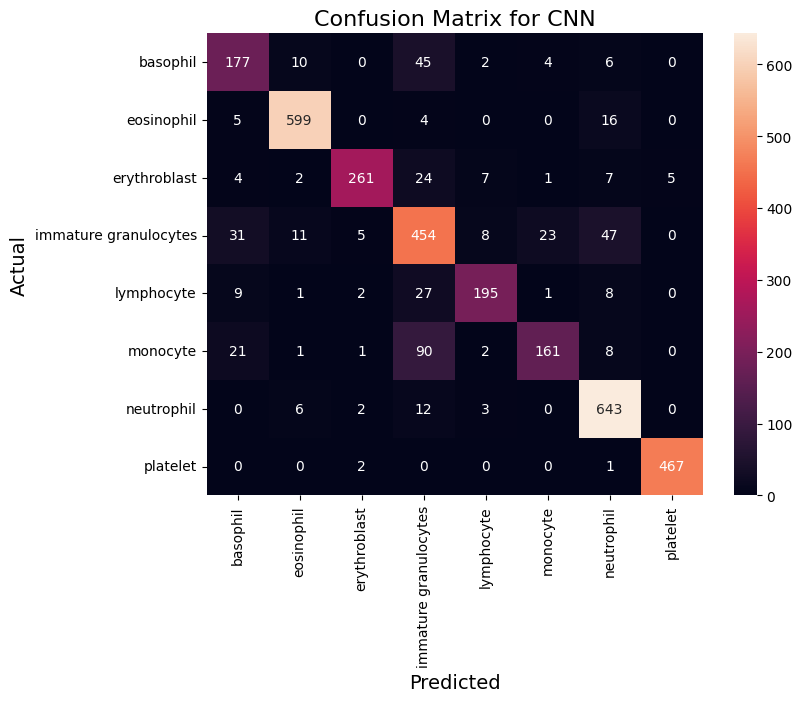

In [ ]:
ret, ret_model, ret_hist = setup_CNN_model(1024, 0, 64, 5, 1, "sparse_categorical_crossentropy", 15, 3, 3, 'relu')
from sklearn.metrics import confusion_matrix
pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "CNN", show_plot=False, cm=cm2, details="CNN_units_1024_batch_64_epoch_15_optimizer_Adam" )

### Evaluate results

In [ ]:
from prettytable import PrettyTable

table_n = PrettyTable(["Unit", "epochs", "kernel height", "kernel widht", "qtd kernel", "loss", "accuracy"])
table_avg = PrettyTable(["Unit", "epochs", "kernel height", "kernel widht", "qtd kernel", "loss", "accuracy"])

listLayers = [1024]
listEpochs= [15]
list_height= [3, 4, 7]
list_width= [3, 4, 7]
list_qtd_kernel= [3, 9, 15, 24, 30]


list_acc = []
list_loss = []
list_ret = []
list_ret_model = []
list_ret_hist = []
list_cm = []          ## confusion matrix

# _, _m, hist = setup_MLP_model(1024, 0, 32, 30, 1, "MLP", 'sparse_categorical_crossentropy')

for l in listLayers:
  for e in listEpochs:
    for h in list_height:
      for w in list_width:
        for k in list_qtd_kernel:
          lossSum = 0
          accuracySum = 0
          for n in range(0,3,1):            ### apply to get the average of three interations
            ret, ret_model, ret_hist = setup_CNN_model(units=l, drop_out=0, batch_size=64, epochs=e, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=k, height_k=h, width_k=w, activation='relu')
            lossSum += ret[0]
            accuracySum += ret[1]

            table_n.add_row([l, e, h, w, k, ret[0], ret[1], n])

            list_ret_model.append(ret_model)
            list_ret_hist.append(ret_hist)
            list_ret.append(ret)
            list_cm.append(confusion_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten()))

          list_acc.append(accuracySum/3)
          list_loss.append(lossSum/3)

        table_avg.add_row([l, e, h, w, k, lossSum/3, accuracySum/3])


#### Definição de layers por epocas

kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=5
Epoch 1/5
187/187 [==============================] - 8s 36ms/step - loss: 11.3298 - accuracy: 0.1776 - val_loss: 2.0481 - val_accuracy: 0.1945
Epoch 2/5
187/187 [==============================] - 7s 35ms/step - loss: 2.0368 - accuracy: 0.1947 - val_loss: 2.0254 - val_accuracy: 0.1945
Epoch 3/5
187/187 [==============================] - 5s 28ms/step - loss: 2.0199 - accuracy: 0.1948 - val_loss: 2.0137 - val_accuracy: 0.1945
Epoch 4/5
187/187 [==============================] - 8s 40ms/step - loss: 2.0102 - accuracy: 0.1948 - val_loss: 2.0078 - val_accuracy: 0.1945
Epoch 5/5
187/187 [==============================] - 8s 40ms/step - loss: 2.0061 - accuracy: 0.1948 - val_loss: 2.0052 - val_accuracy: 0.1945
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shap

<ipython-input-30-3029b4949e56>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 8s 37ms/step - loss: 6.4993 - accuracy: 0.2897 - val_loss: 1.5960 - val_accuracy: 0.4994
Epoch 2/15
187/187 [==============================] - 5s 28ms/step - loss: 1.4167 - accuracy: 0.5385 - val_loss: 1.0511 - val_accuracy: 0.6361
Epoch 3/15
187/187 [==============================] - 5s 27ms/step - loss: 1.0070 - accuracy: 0.6552 - val_loss: 0.7205 - val_accuracy: 0.7371
Epoch 4/15
187/187 [==============================] - 9s 46ms/step - loss: 0.7967 - accuracy: 0.7091 - val_loss: 0.6015 - val_accuracy: 0.7792
Epoch 5/15
187/187 [==============================] - 6s 31ms/step - loss: 0.6908 - accuracy: 0.7443 - val_loss: 0.5324 - val_accuracy: 0.7839
Epoch 6/15
187/187 [==============================] - 5s 29ms/step - loss: 0.6462 - accuracy: 0.7592 - val_loss: 0.4900 - va

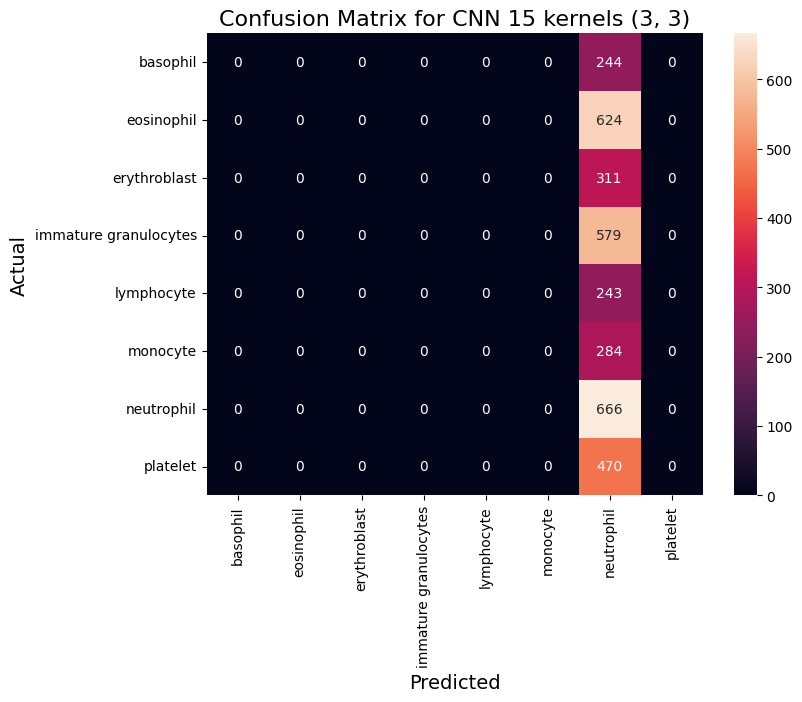

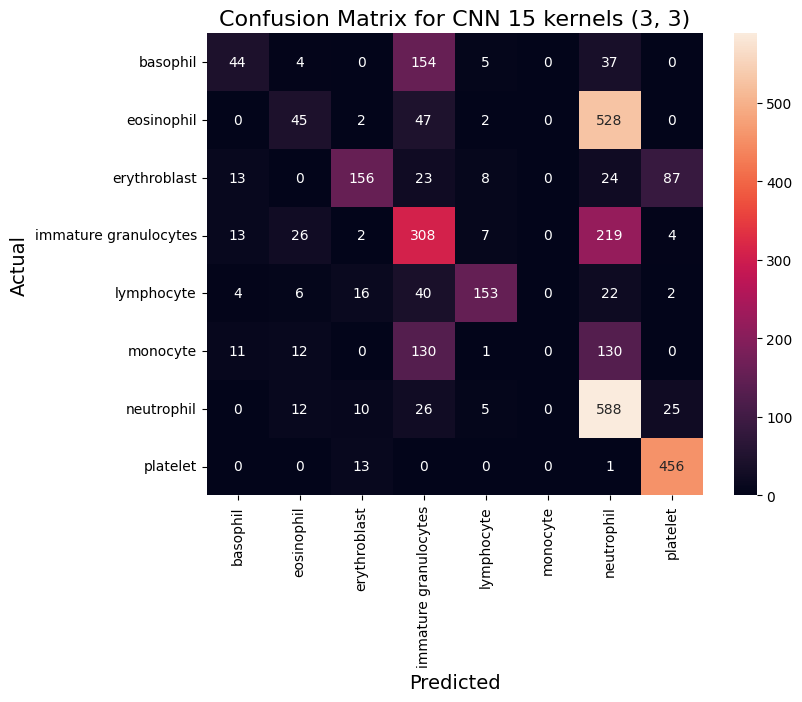

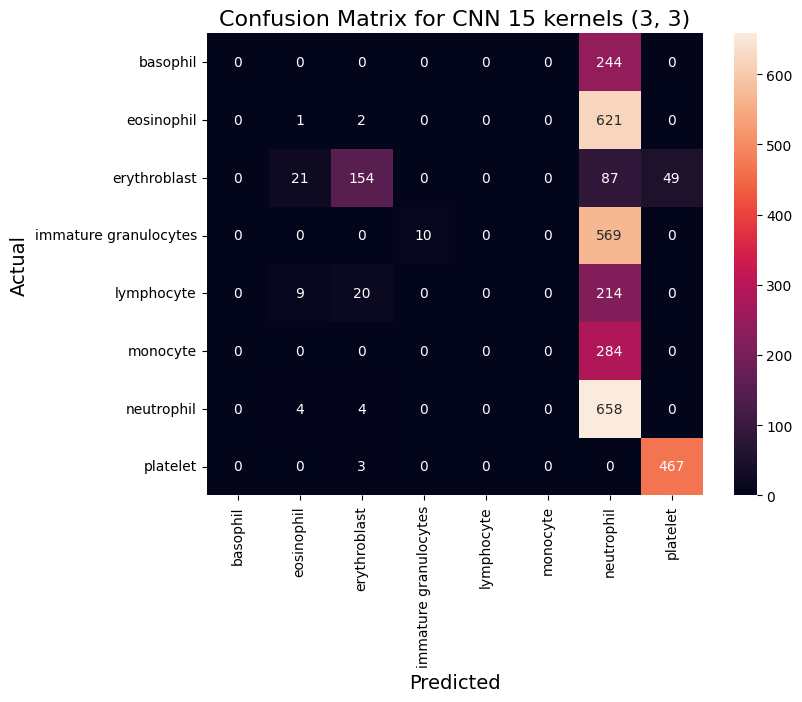

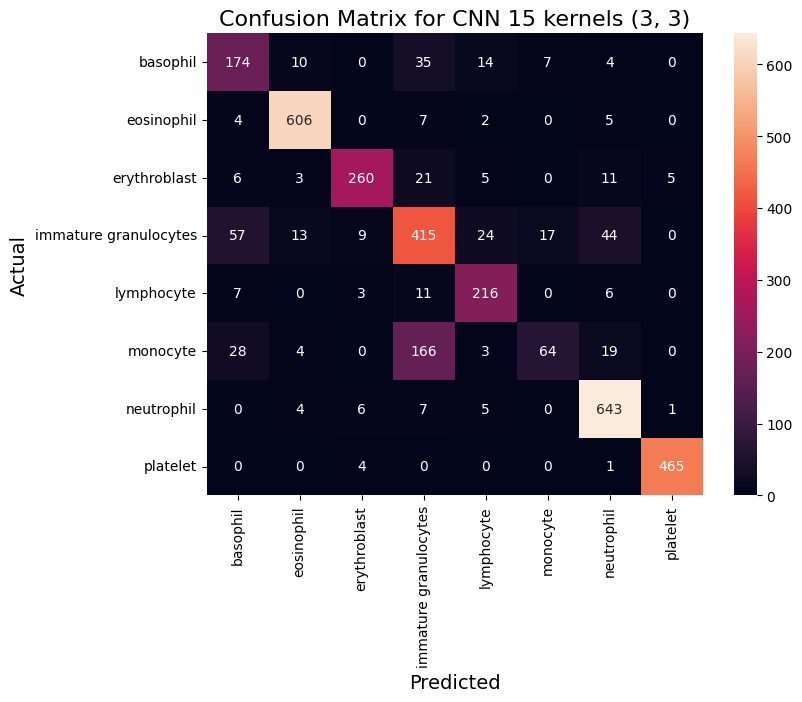

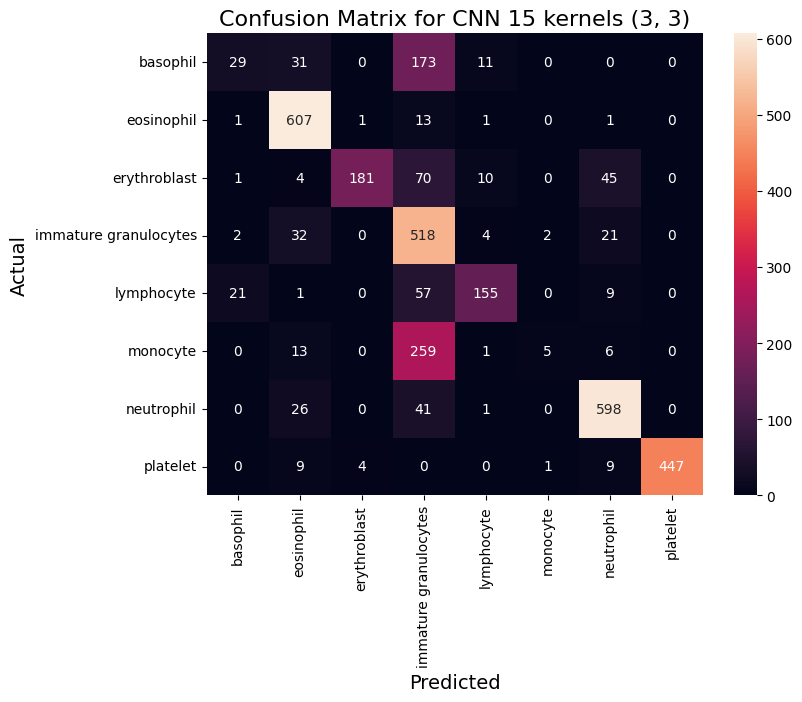

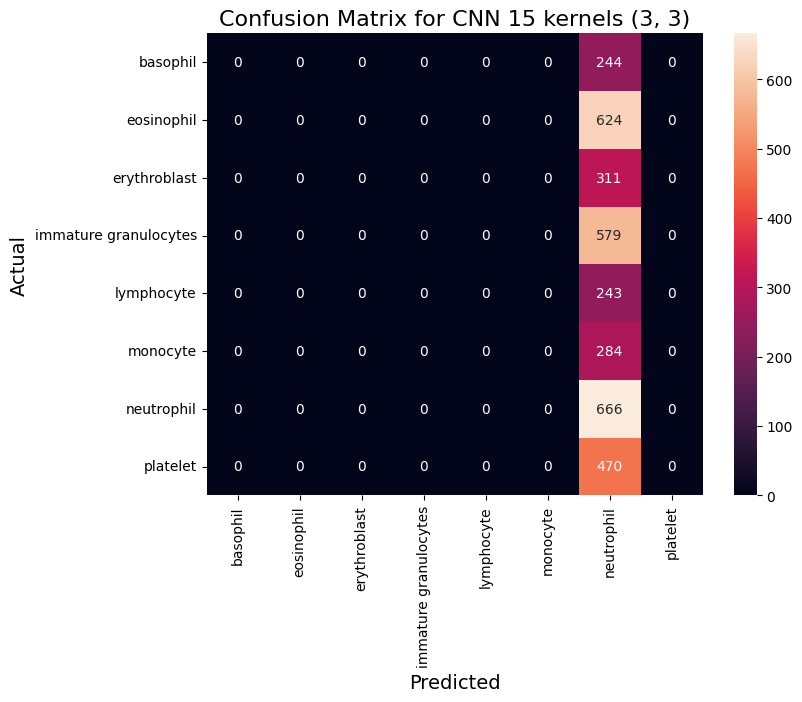

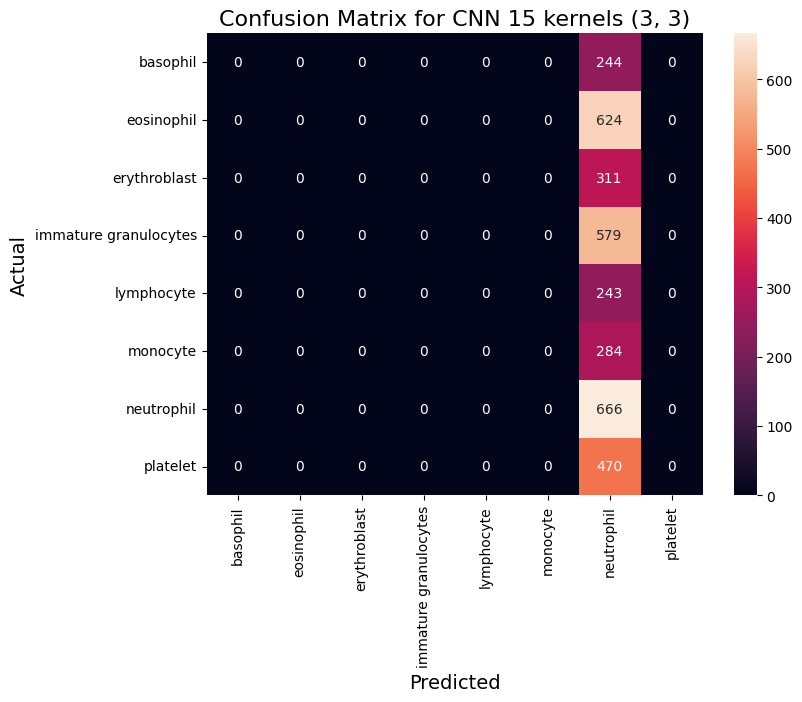

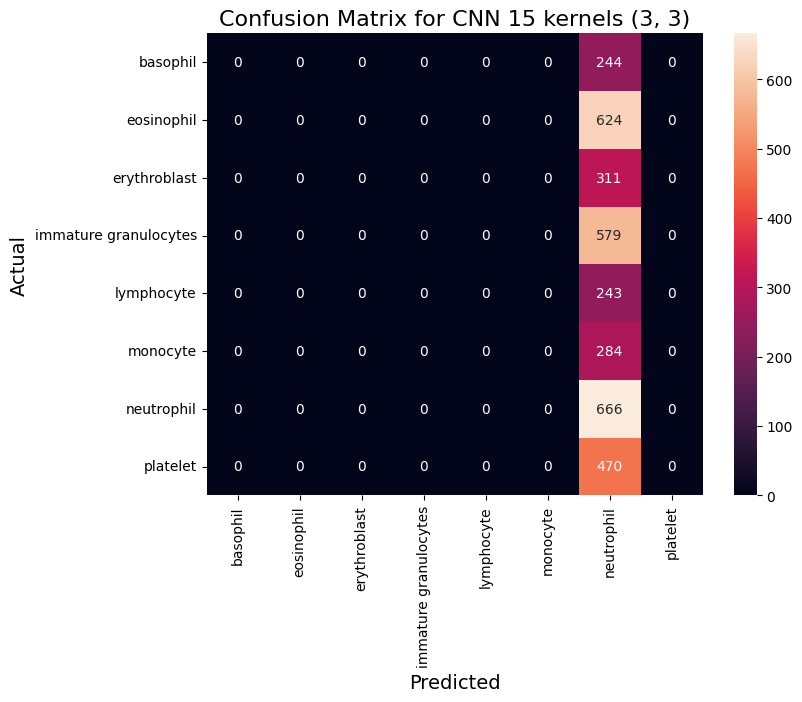

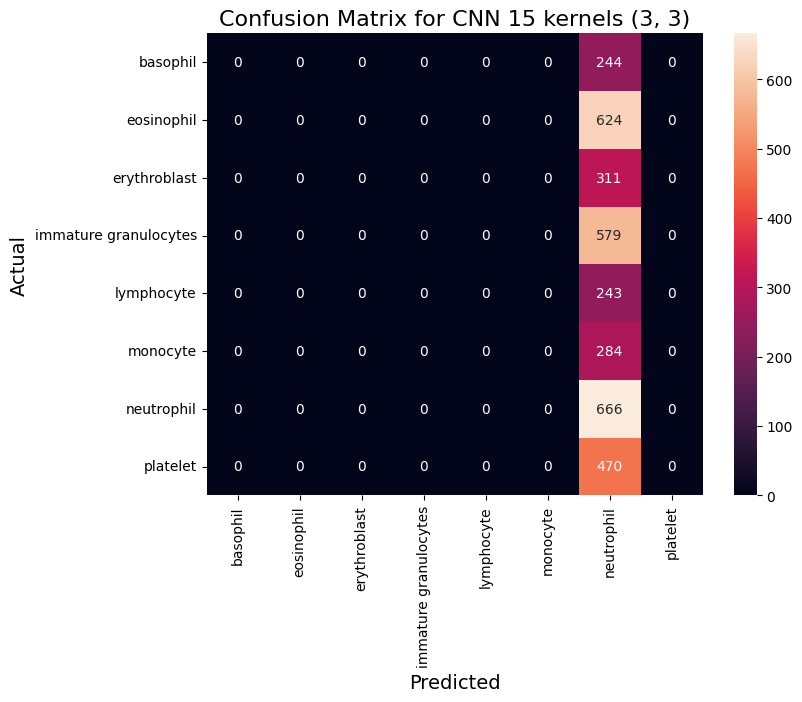

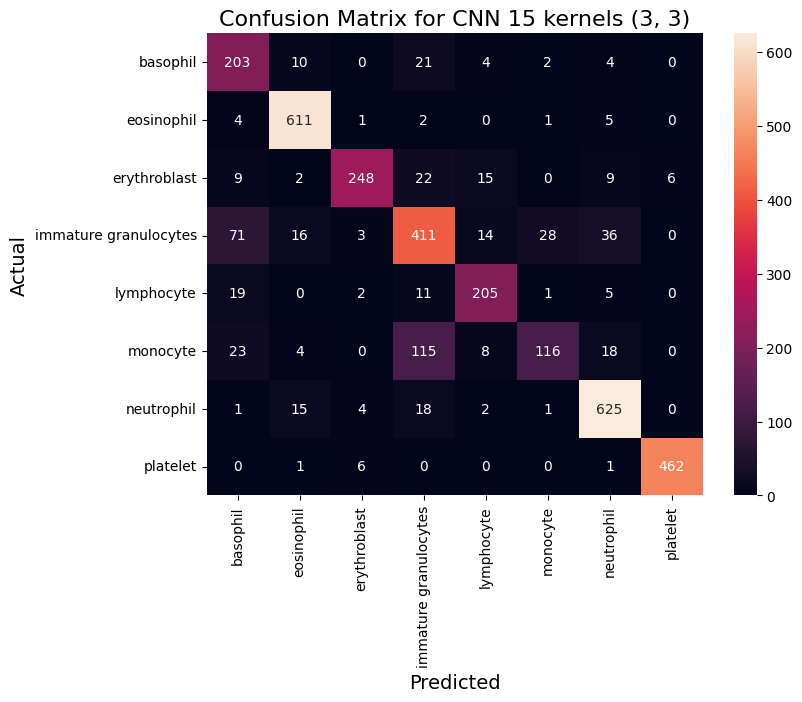

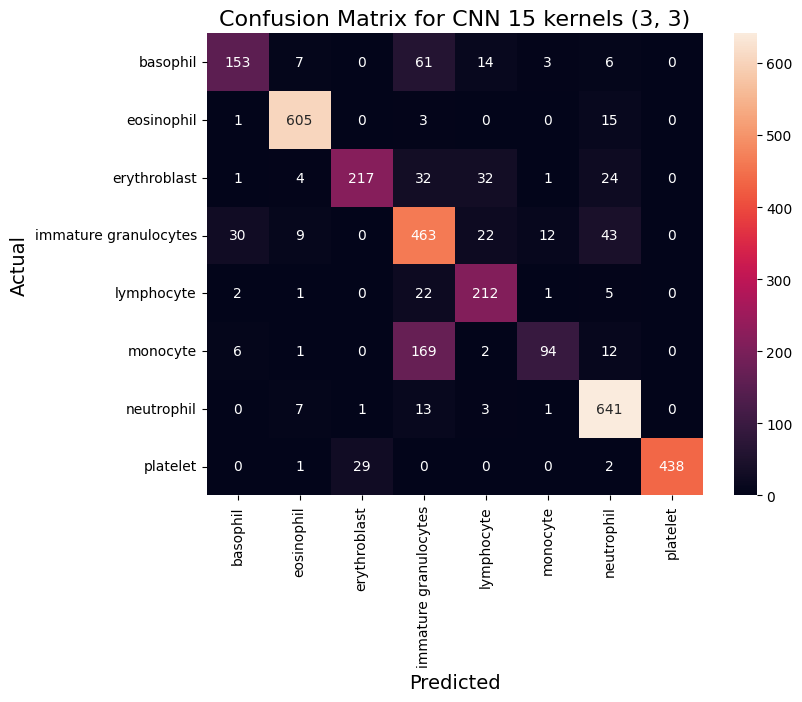

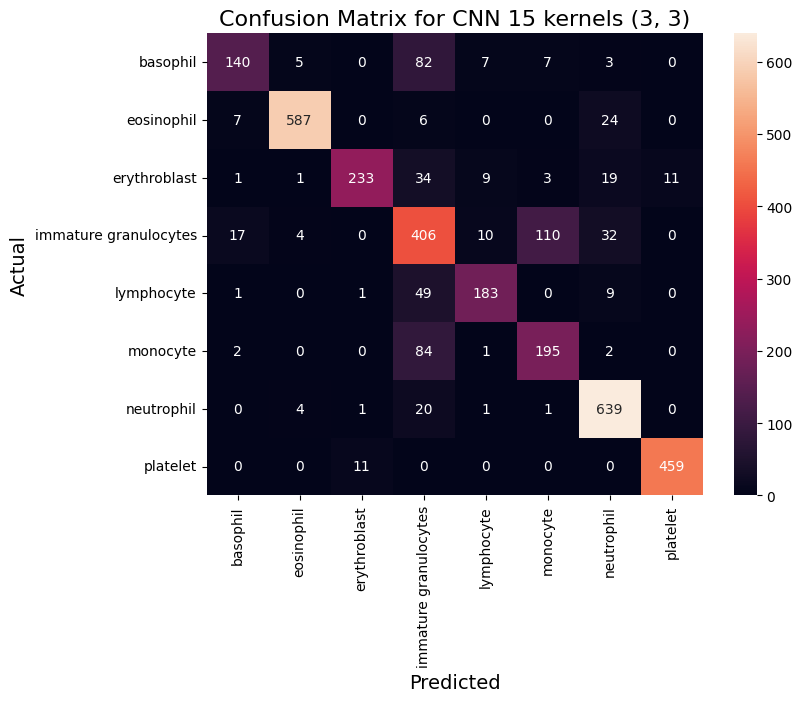

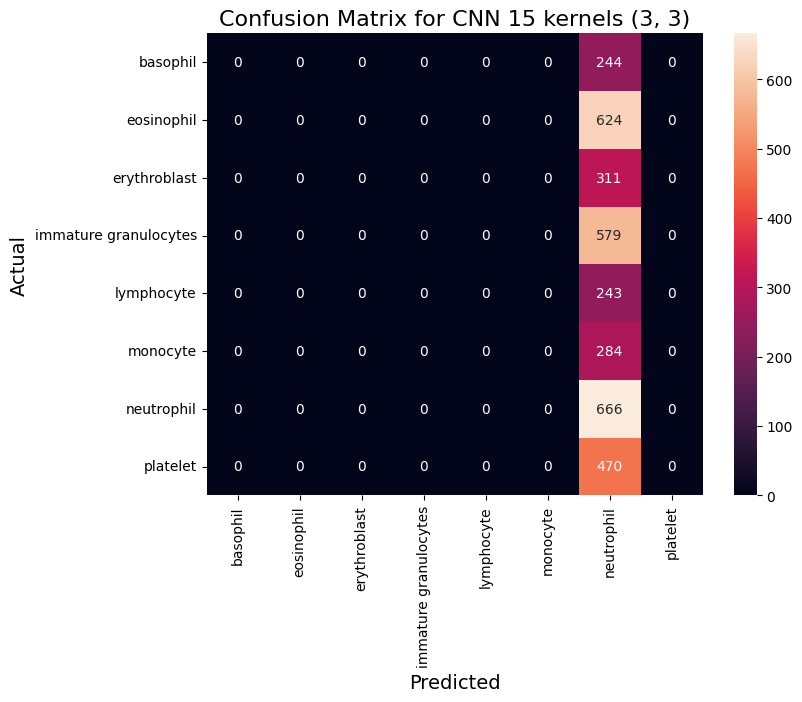

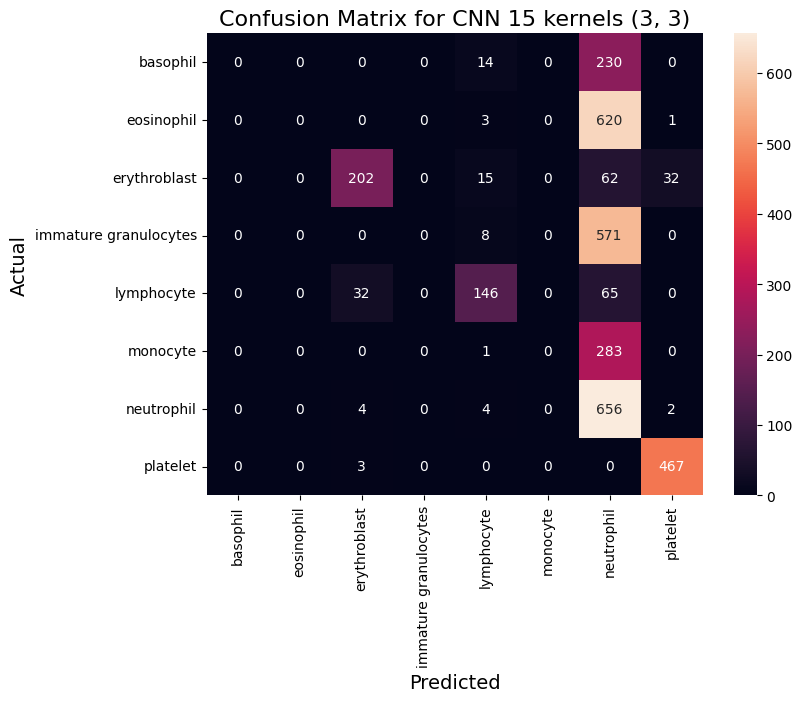

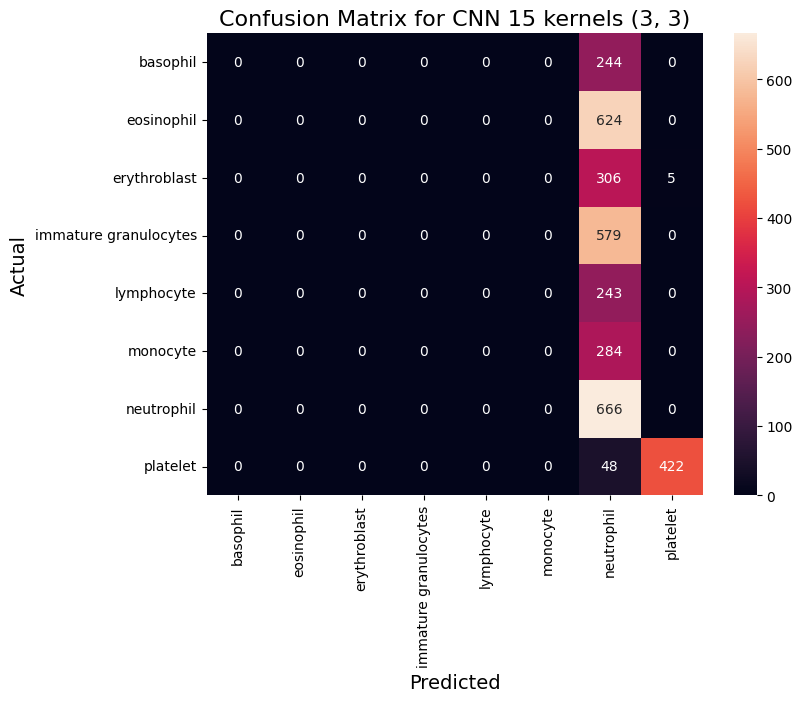

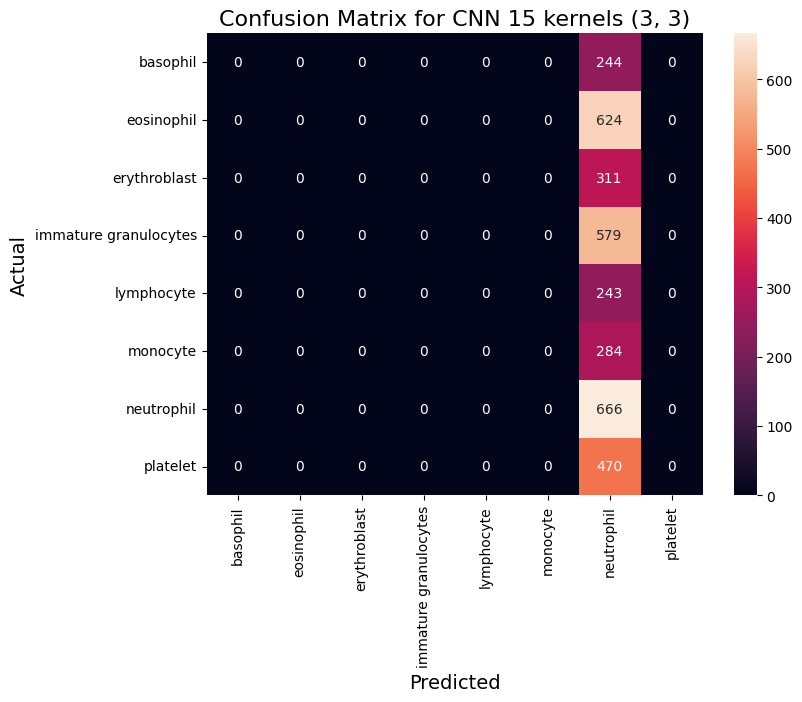

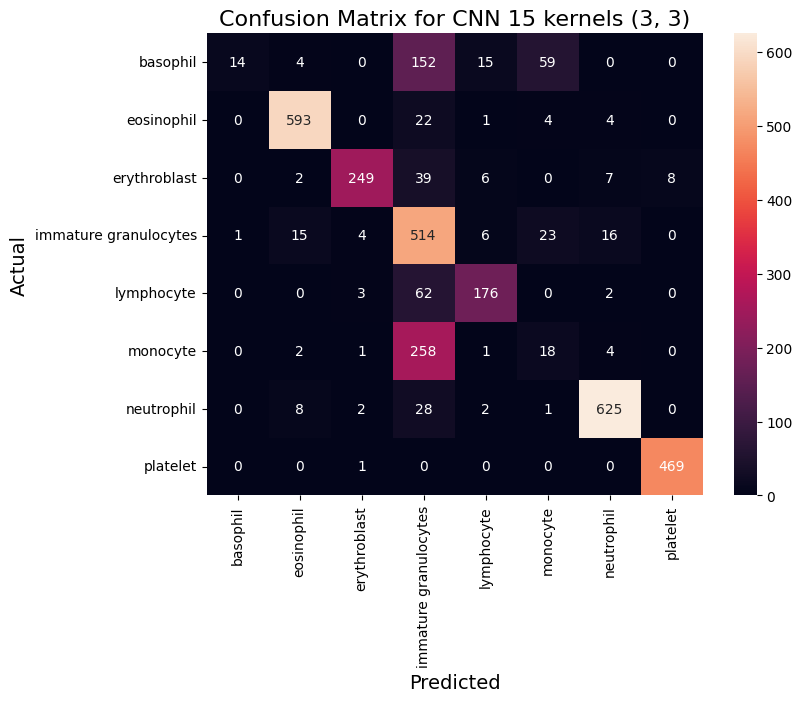

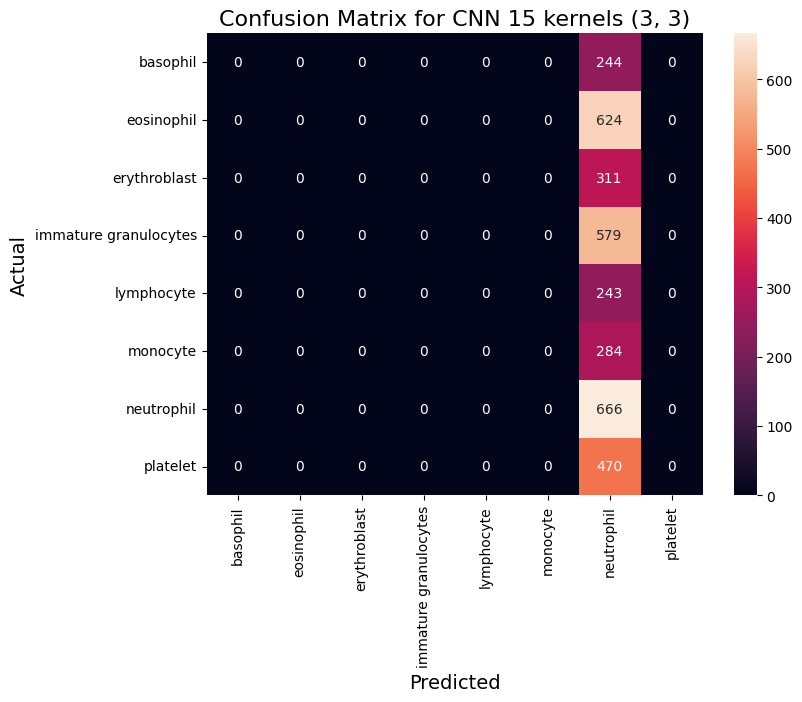

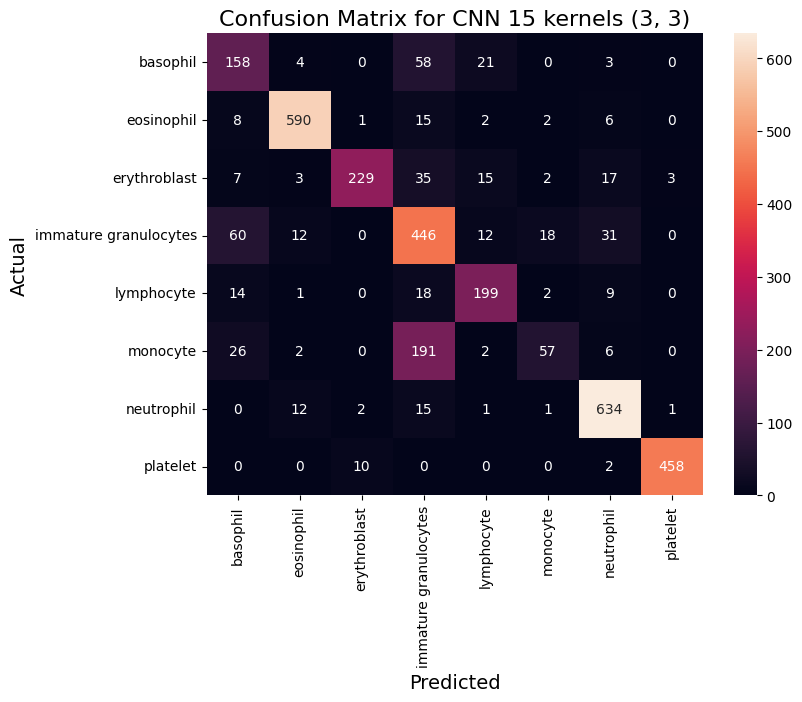

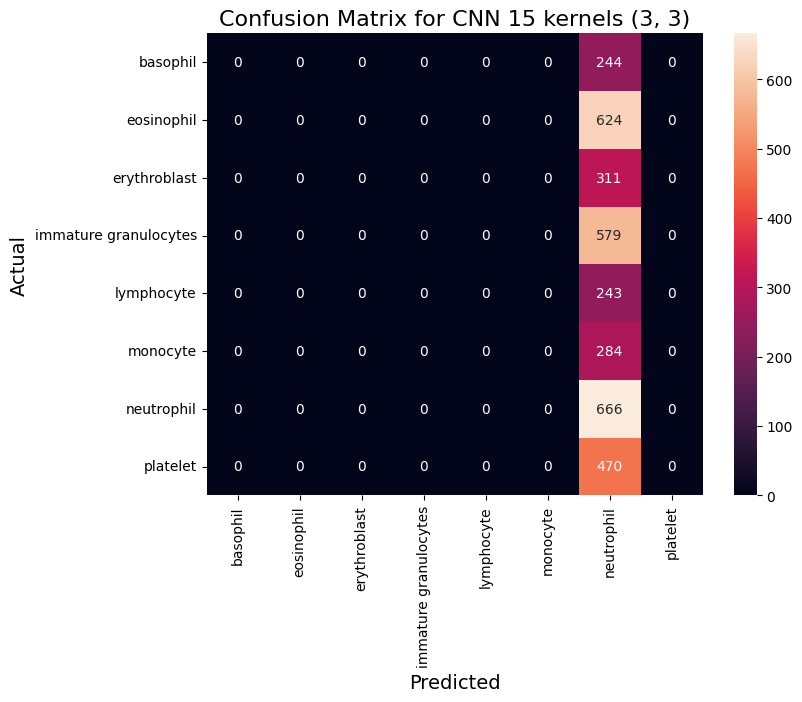

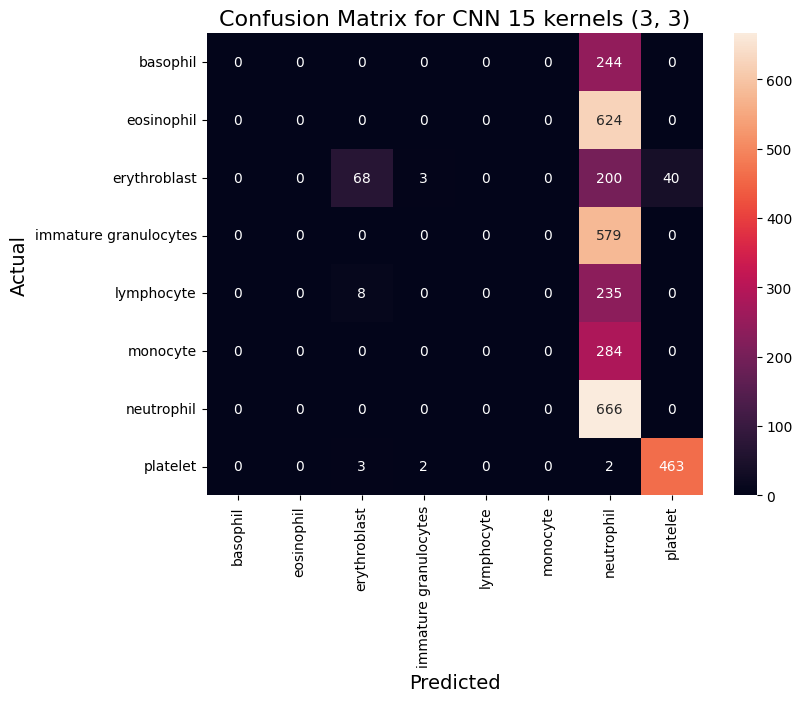

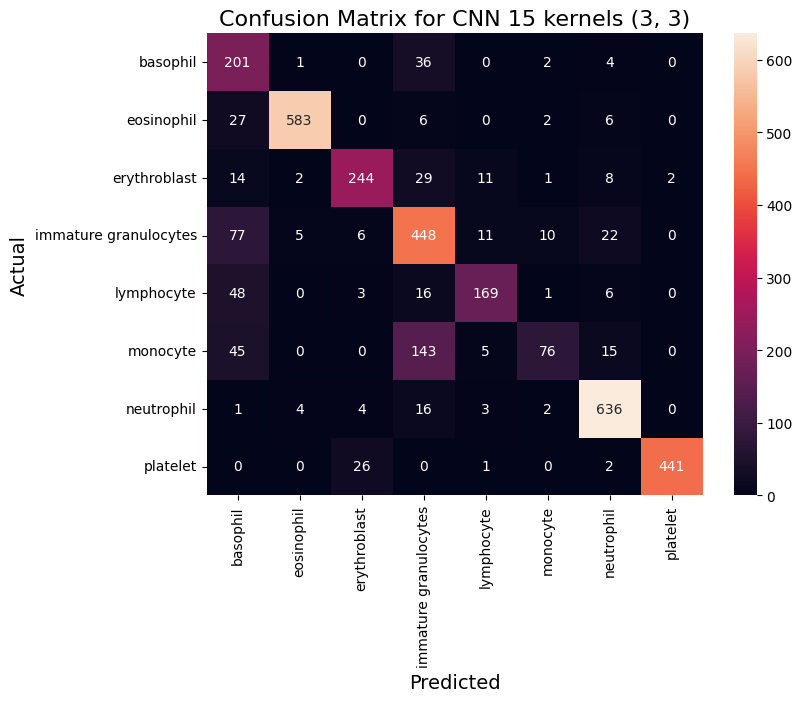

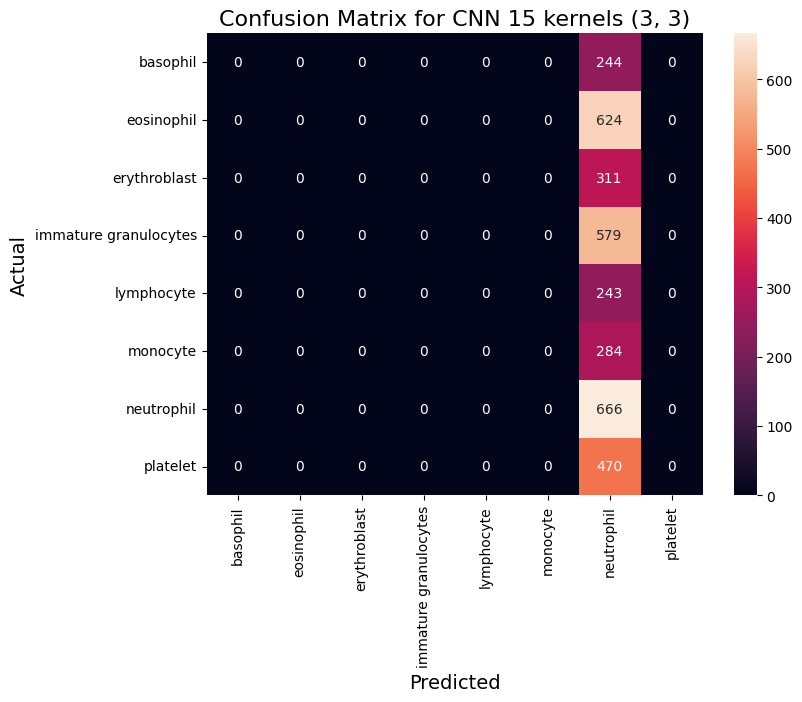

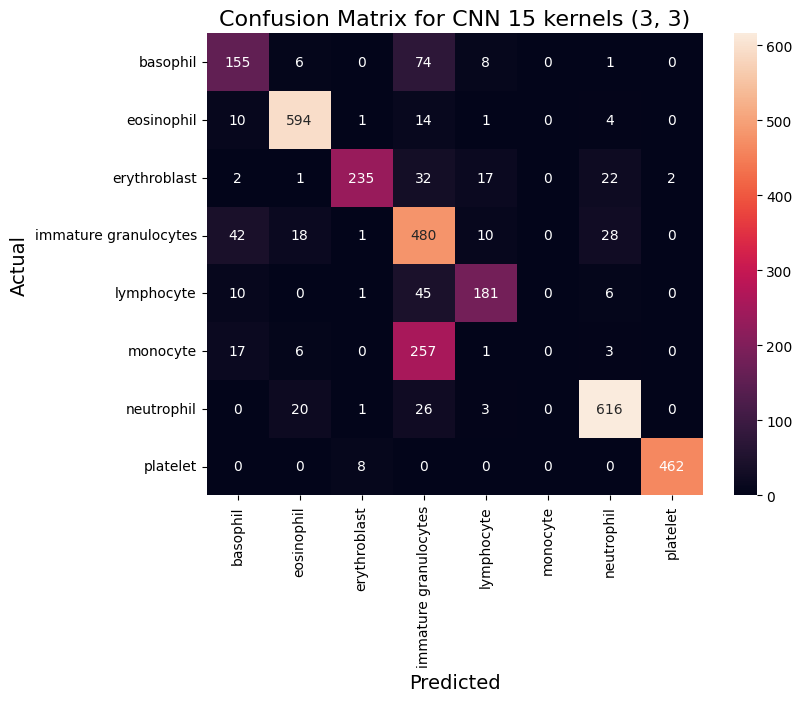

In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix

table_n = PrettyTable(["Unit", "epochs",  "loss", "accuracy", "n"])
table_avg = PrettyTable(["Unit", "epochs",  "loss", "accuracy", "n"])

listLayers = [512, 1024, 2048, 3096]
listEpochs= [5, 15]
list_height= [3]
list_width= [3]
list_qtd_kernel= [15]


list_acc = []
list_loss = []
list_ret = []
list_ret_model = []
list_ret_hist = []
list_cm = []          ## confusion matrix

# _, _m, hist = setup_MLP_model(1024, 0, 32, 30, 1, "MLP", 'sparse_categorical_crossentropy')

for l in listLayers:
  for e in listEpochs:
    for h in list_height:
      for w in list_width:
        for k in list_qtd_kernel:
          lossSum = 0
          accuracySum = 0
          for n in range(0,3,1):            ### apply to get the average of three interations
            ret, ret_model, ret_hist = setup_CNN_model(units=l, drop_out=0, batch_size=64, epochs=e, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=k, height_k=h, width_k=w, activation='relu')
            lossSum += ret[0]
            accuracySum += ret[1]

            table_n.add_row([l, e, ret[0], ret[1], n])

            list_ret_model.append(ret_model)
            list_ret_hist.append(ret_hist)
            list_ret.append(ret)

            cm2=confusion_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten())
            list_cm.append(cm2)
            plot_conf_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten(),
                             f"CNN {k} kernels ({h}, {w})", show_plot=False, cm=cm2,
                             details=f"_units_{l}_epoch_{e}_n_test_{n}_kernel_{k}_h_{h}_w_{w}", path_compl="ConfMatrix/LayerEpoch")

          list_acc.append(accuracySum/3)
          list_loss.append(lossSum/3)

        table_avg.add_row([l, e, lossSum/3, accuracySum/3, "avg"])

with open(f'{path_drive}/CNN/comparison_layers_epochs.csv', 'w', newline='') as f_output:
  f_output.write(table_n.get_csv_string())

with open(f'{path_drive}/CNN/comparison_layers_epochs_avg', 'w', newline='') as f_output:
  f_output.write(table_avg.get_csv_string())





In [ ]:
print(table_n)


+------+--------+--------------------+---------------------+---+
| Unit | epochs |        loss        |       accuracy      | n |
+------+--------+--------------------+---------------------+---+
| 512  |   5    | 2.0050086975097656 | 0.19467991590499878 | 0 |
| 512  |   5    | 1.2478885650634766 |  0.5115463137626648 | 1 |
| 512  |   5    | 1.5627052783966064 |  0.3770827353000641 | 2 |
| 512  |   15   | 0.5019621253013611 |  0.831043541431427  | 0 |
| 512  |   15   | 0.7346816658973694 |  0.7424729466438293 | 1 |
| 512  |   15   | 2.003089189529419  | 0.19467991590499878 | 2 |
| 1024 |   5    | 2.0050058364868164 | 0.19467991590499878 | 0 |
| 1024 |   5    | 2.004852294921875  | 0.19467991590499878 | 1 |
| 1024 |   5    | 2.0052614212036133 | 0.19467991590499878 | 2 |
| 1024 |   15   | 0.4823095500469208 |  0.842151403427124  | 0 |
| 1024 |   15   | 0.4955790340900421 |  0.8251973390579224 | 1 |
| 1024 |   15   | 0.5016058683395386 |  0.8307512402534485 | 2 |
| 2048 |   5    | 2.00495

In [ ]:
print(table_avg)

+------+--------+--------------------+---------------------+-----+
| Unit | epochs |        loss        |       accuracy      |  n  |
+------+--------+--------------------+---------------------+-----+
| 512  |   5    | 1.6052008469899495 | 0.36110298832257587 | avg |
| 512  |   15   | 1.0799109935760498 |  0.5893988013267517 | avg |
| 1024 |   5    | 2.005039850870768  | 0.19467991590499878 | avg |
| 1024 |   15   | 0.4931648174921672 |  0.8326999942461649 | avg |
| 2048 |   5    | 1.7183517217636108 |  0.3142356077829997 | avg |
| 2048 |   15   | 1.5373459657033284 |  0.3887752095858256 | avg |
| 3096 |   5    | 1.391352355480194  | 0.45152489344278973 | avg |
| 3096 |   15   | 1.0175896088282268 |  0.6028451720873514 | avg |
+------+--------+--------------------+---------------------+-----+


### Kernel quantity

kernel=(3,3), 3 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 10s 41ms/step - loss: 9.6334 - accuracy: 0.2526 - val_loss: 1.8832 - val_accuracy: 0.2950
Epoch 2/15
187/187 [==============================] - 7s 37ms/step - loss: 1.9221 - accuracy: 0.3081 - val_loss: 1.7157 - val_accuracy: 0.3592
Epoch 3/15
187/187 [==============================] - 7s 39ms/step - loss: 1.7202 - accuracy: 0.3880 - val_loss: 1.5574 - val_accuracy: 0.4153
Epoch 4/15
187/187 [==============================] - 8s 41ms/step - loss: 1.5538 - accuracy: 0.4306 - val_loss: 1.2651 - val_accuracy: 0.5210
Epoch 5/15
187/187 [==============================] - 4s 23ms/step - loss: 1.3692 - accuracy: 0.4897 - val_loss: 1.1288 - val_accuracy: 0.5754
Epoch 6/15
187/187 [==============================] - 3s 18ms/step - loss: 1.2552 - accuracy: 0.5378 - val_loss: 1.0827 - va

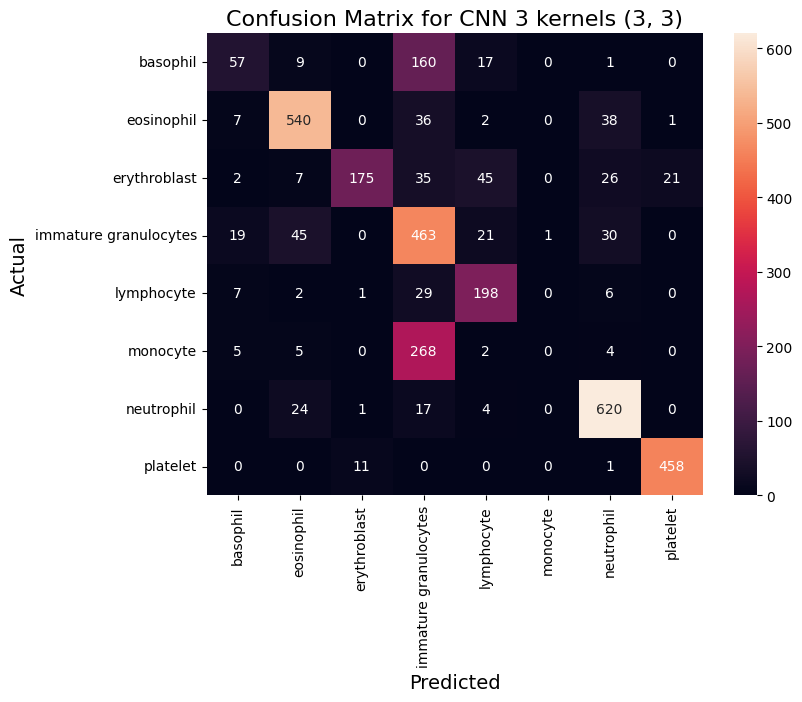

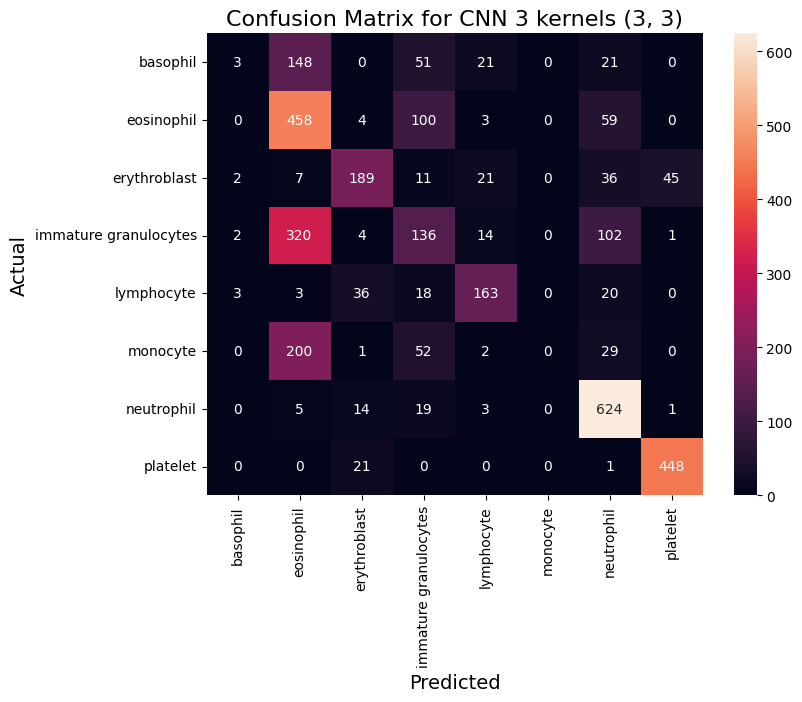

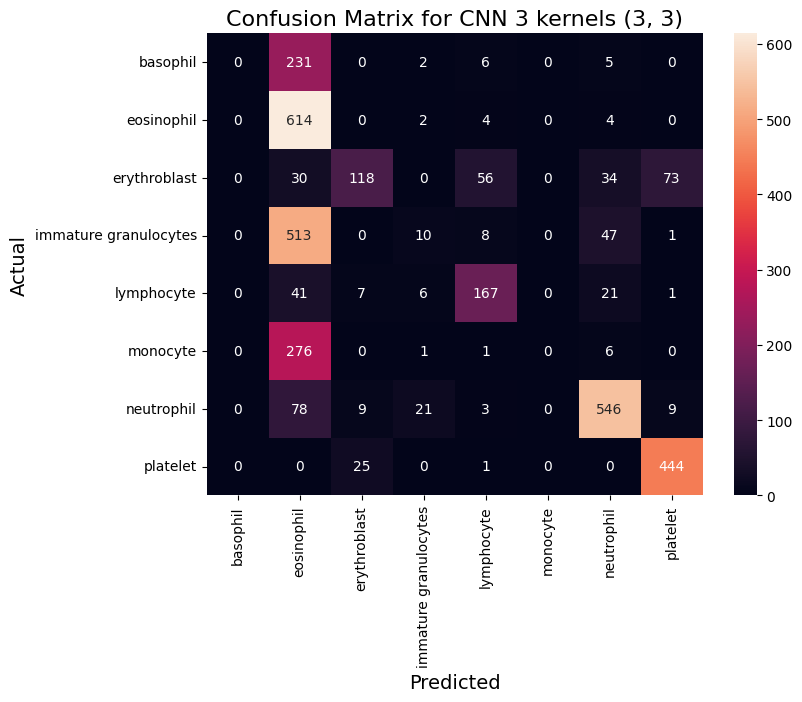

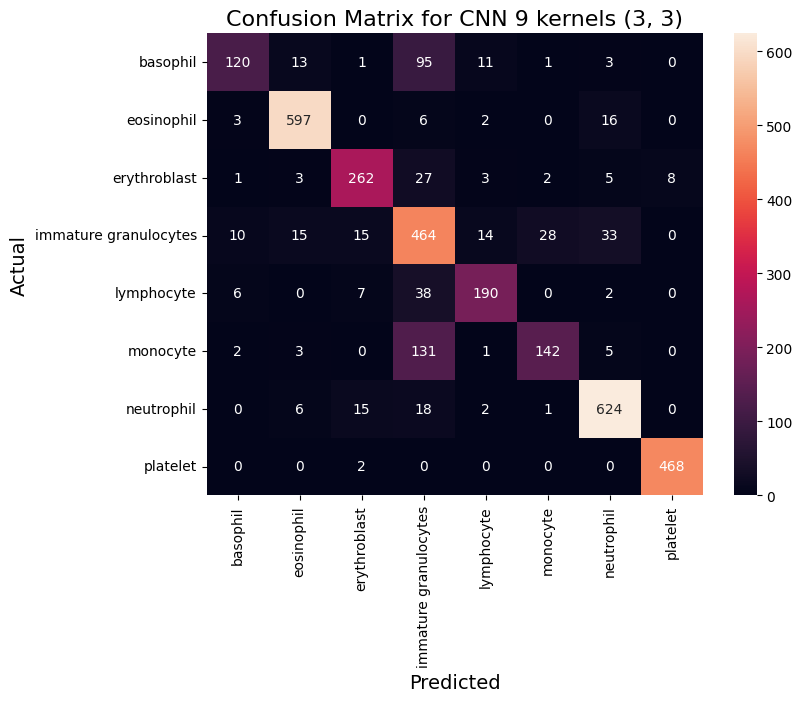

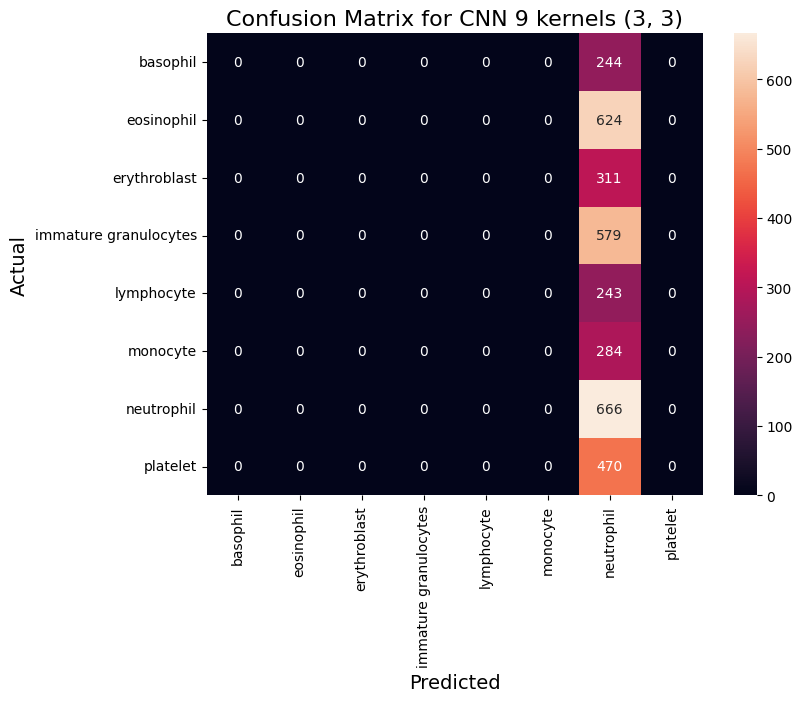

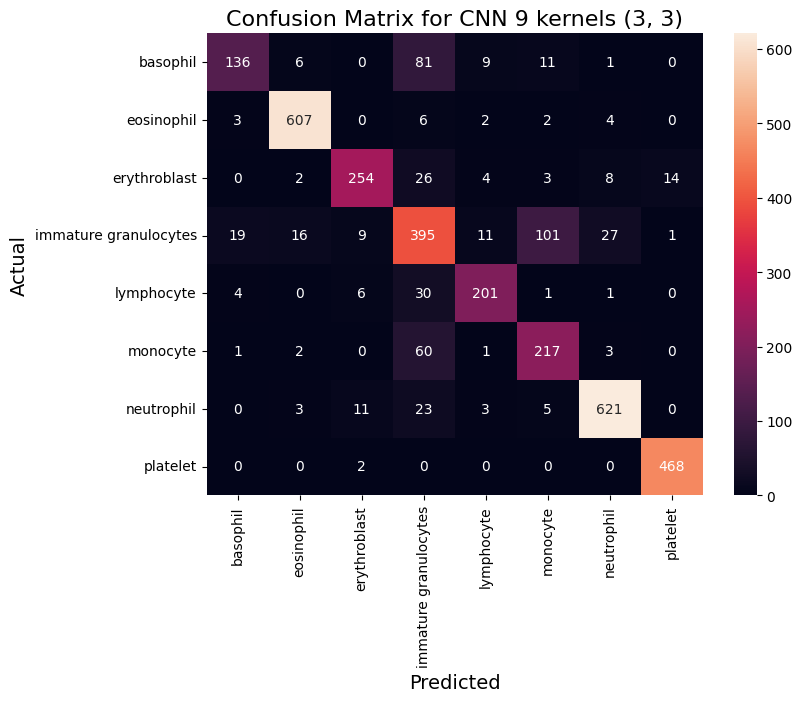

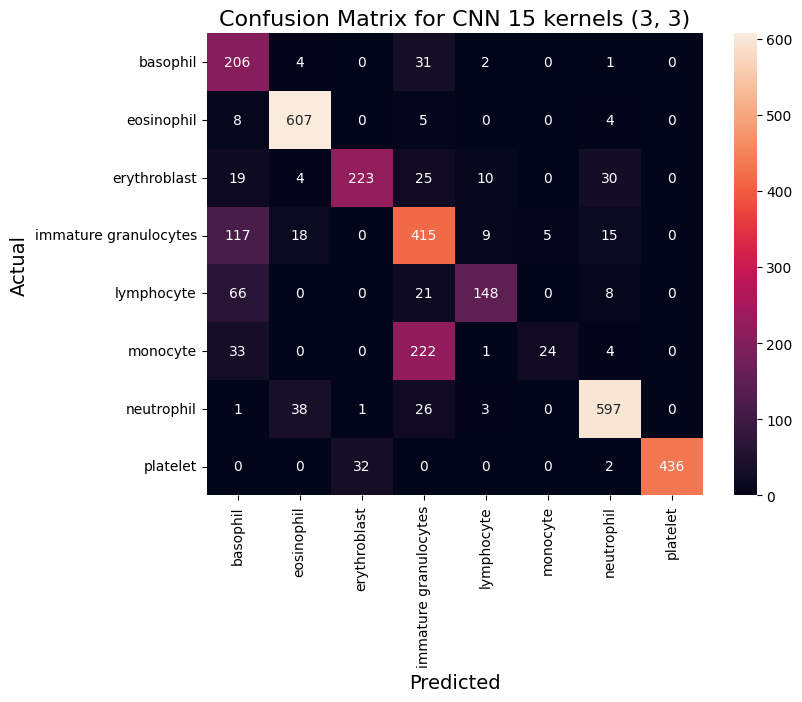

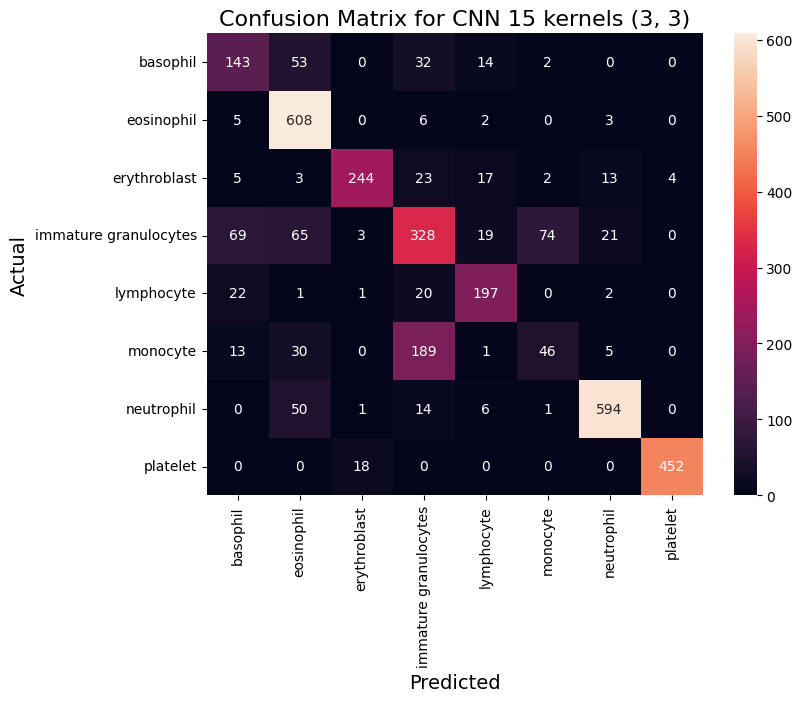

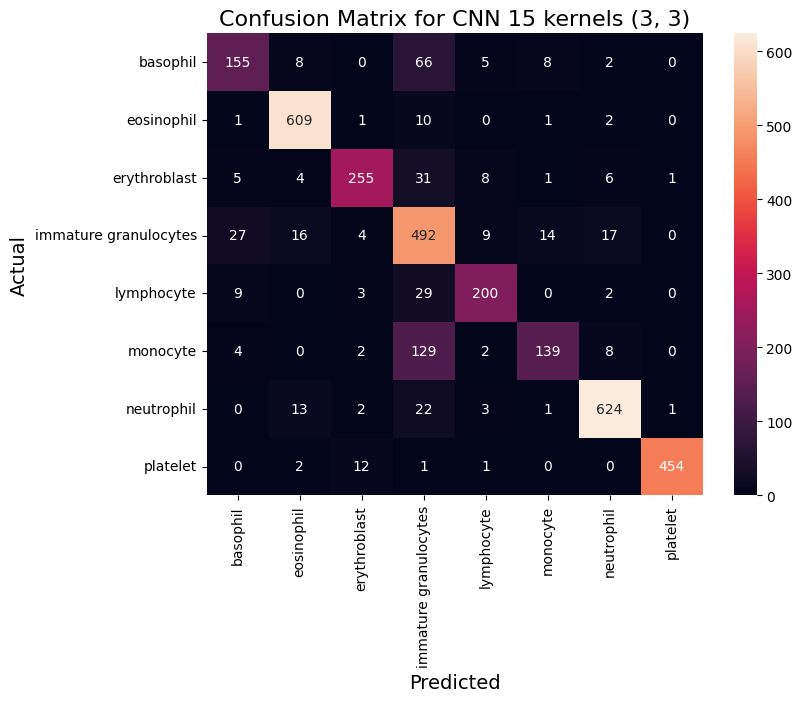

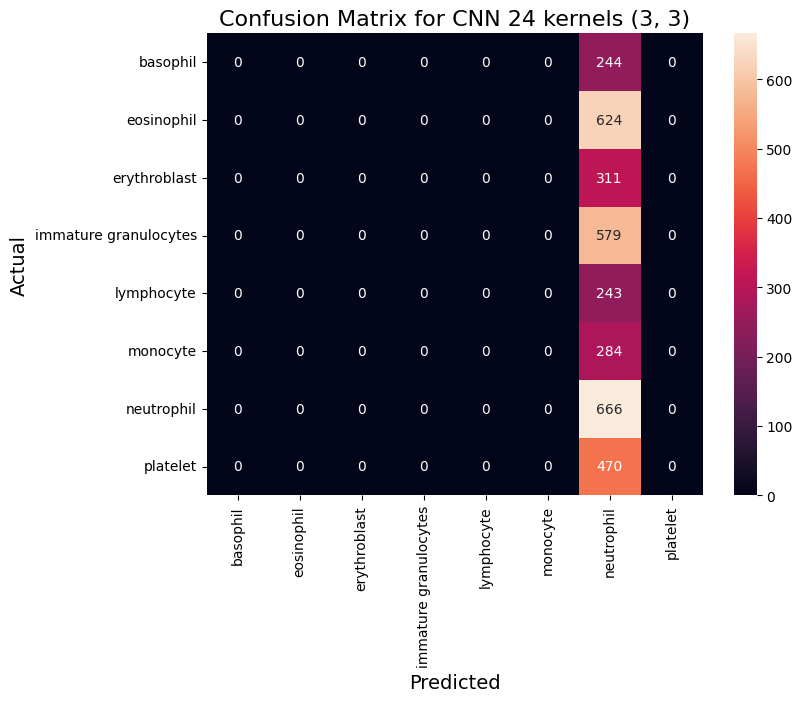

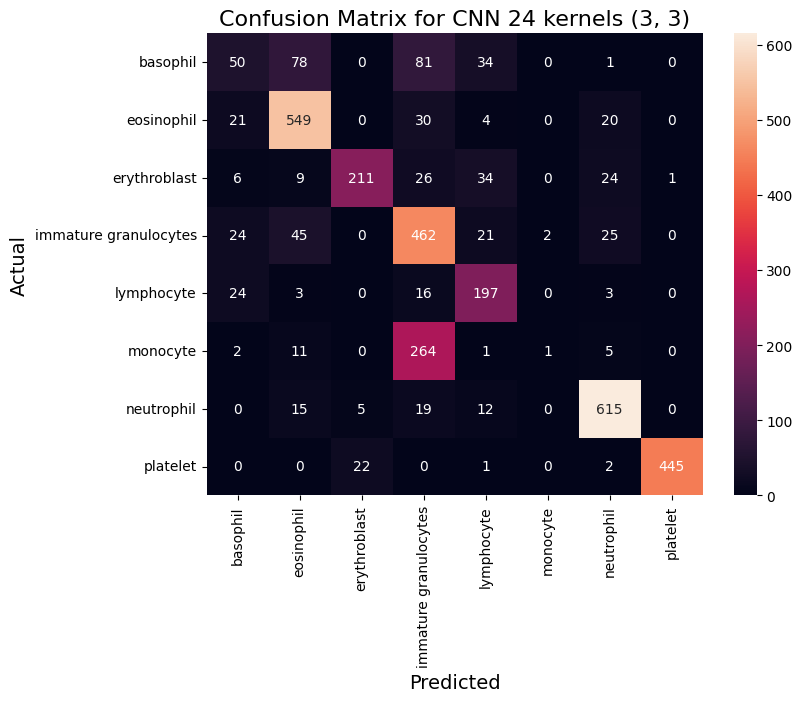

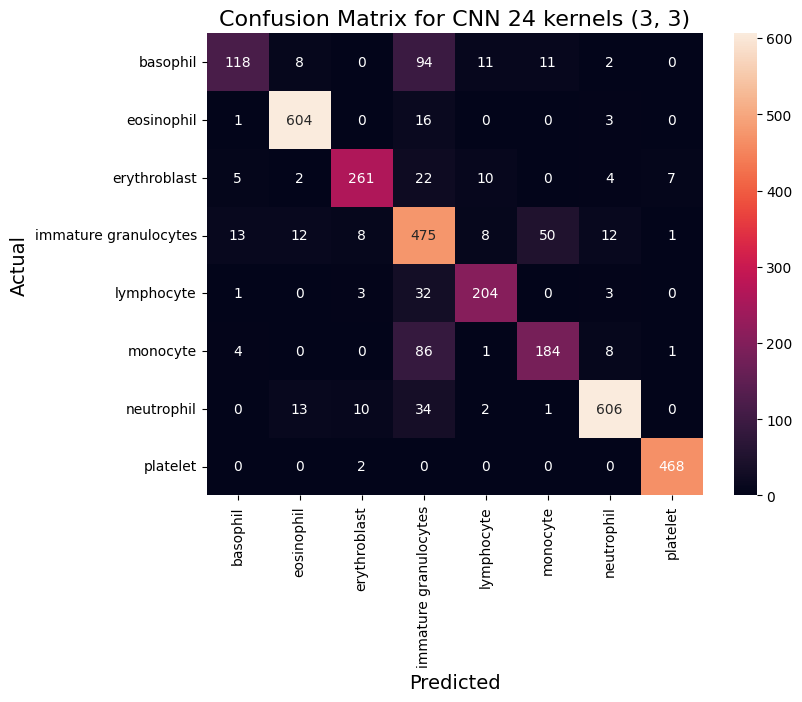

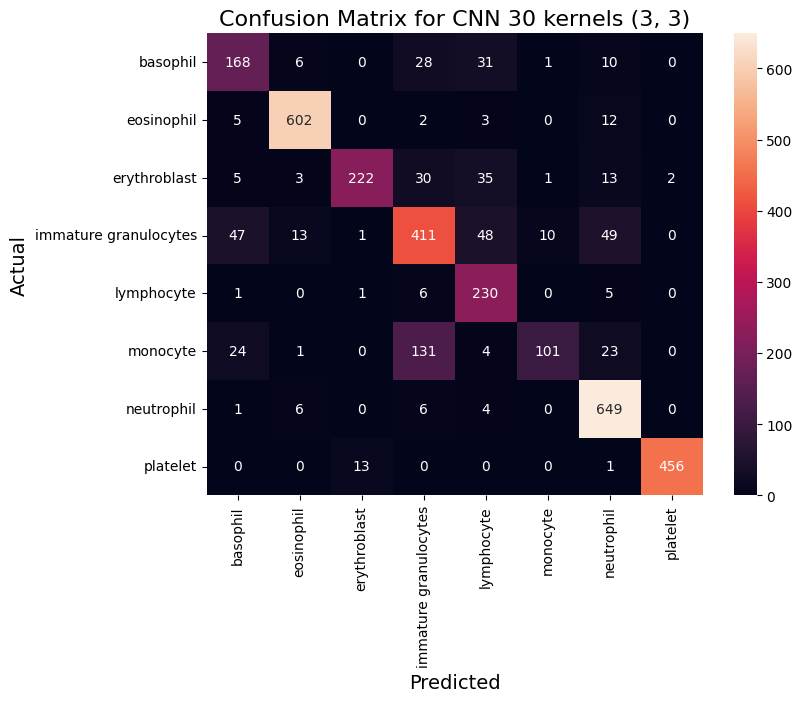

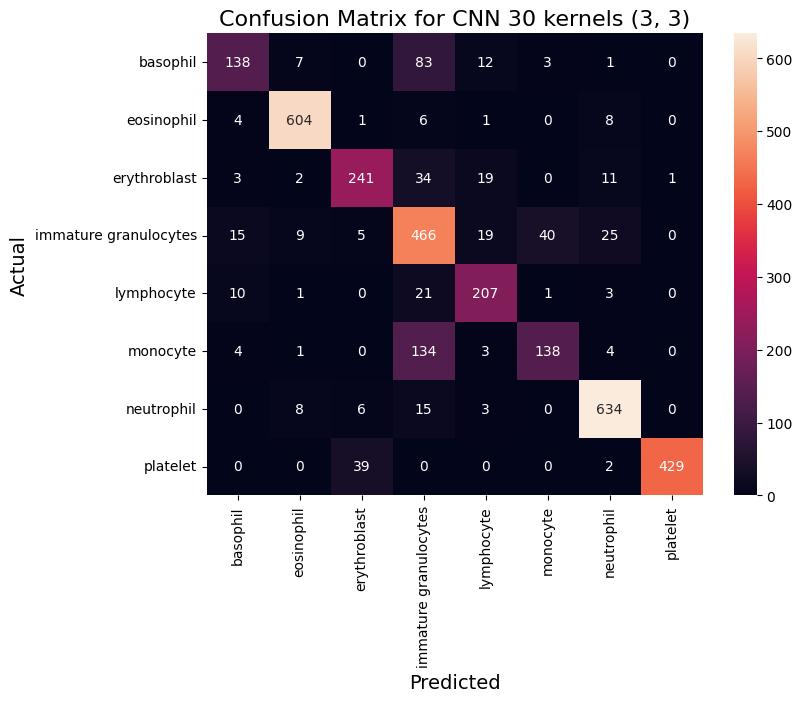

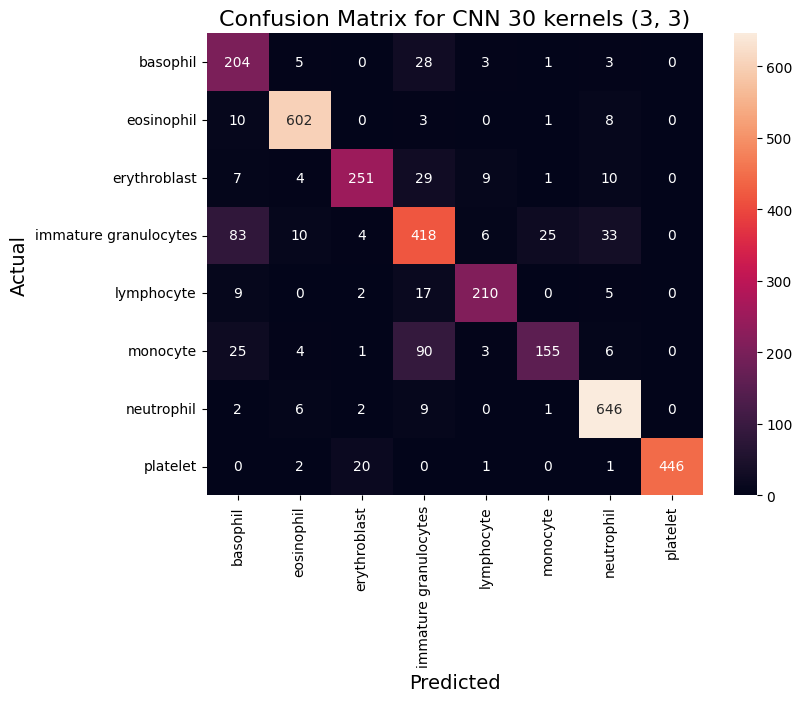

In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix

table_n = PrettyTable(["kernel height", "kernel widht", "qtd kernel", "loss", "accuracy", "n"])
table_avg = PrettyTable(["kernel height", "kernel widht", "qtd kernel", "loss", "accuracy", "n"])

listLayers = [1024]
listEpochs= [15]
list_height= [3]
list_width= [3]
list_qtd_kernel= [3, 9, 15, 24, 30]

list_2_acc = []
list_2_loss = []
list_2_ret = []
list_2_ret_model = []
list_2_ret_hist = []
list_2_cm = []          ## confusion matrix

# _, _m, hist = setup_MLP_model(1024, 0, 32, 30, 1, "MLP", 'sparse_categorical_crossentropy')

for l in listLayers:
  for e in listEpochs:
    for h in list_height:
      for w in list_width:
        for k in list_qtd_kernel:
          lossSum = 0
          accuracySum = 0
          for n in range(0,3,1):            ### apply to get the average of three interations
            ret, ret_model, ret_hist = setup_CNN_model(units=l, drop_out=0, batch_size=64, epochs=e, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=k, height_k=h, width_k=w, activation='relu')
            lossSum += ret[0]
            accuracySum += ret[1]

            table_n.add_row([h, w, k, ret[0], ret[1], n])

            list_2_ret_model.append(ret_model)
            list_2_ret_hist.append(ret_hist)
            list_2_ret.append(ret)

            cm2=confusion_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten())
            list_2_cm.append(cm2)
            plot_conf_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten(),
                             f"CNN {k} kernels ({h}, {w})", show_plot=False, cm=cm2,
                             details=f"_units_{l}_epoch_{e}_n_test_{n}_epoch_{e}_kernel_{k}_h_{h}_w_{w}", path_compl="ConfMatrix/Kernel")

          list_2_acc.append(accuracySum/3)
          list_2_loss.append(lossSum/3)

          table_avg.add_row([h, w, k, lossSum/3, accuracySum/3, "avg"])

with open(f'{path_drive}/CNN/ConfMatrix/comparison_kernels_{h}_{w}.csv', 'w', newline='') as f_output:
  f_output.write(table_n.get_csv_string())

with open(f'{path_drive}/CNN/ConfMatrix/comparison_kernels_{h}_{w}_avg', 'w', newline='') as f_output:
  f_output.write(table_avg.get_csv_string())



In [ ]:
print(table_n)
print(table_avg)

+---------------+--------------+------------+---------------------+---------------------+---+
| kernel height | kernel widht | qtd kernel |         loss        |       accuracy      | n |
+---------------+--------------+------------+---------------------+---------------------+---+
|       3       |      3       |     3      |  0.7272869348526001 |  0.7339959144592285 | 0 |
|       3       |      3       |     3      |  1.098985195159912  |  0.5907629132270813 | 1 |
|       3       |      3       |     3      |  1.309315800666809  |  0.5551008582115173 | 2 |
|       3       |      3       |     9      | 0.48847708106040955 |  0.8380590677261353 | 0 |
|       3       |      3       |     9      |  2.0030813217163086 | 0.19467991590499878 | 1 |
|       3       |      3       |     9      |  0.4583979547023773 |  0.8474130630493164 | 2 |
|       3       |      3       |     15     |  0.5939791202545166 |  0.7763811945915222 | 0 |
|       3       |      3       |     15     |  0.65828031301

In [ ]:
list_2_acc

[0.6266198952992758,
 0.6267173488934835,
 0.7985969185829163,
 0.595927099386851,
 0.8406898578008016]

In [ ]:
table_avg = PrettyTable(["kernel height", "kernel widht", "qtd kernel", "loss", "accuracy", "n"])
for l in range(0, len(list_2_acc), 1) :
  table_avg.add_row([3, 3, list_qtd_kernel[l], list_2_loss[l], list_2_acc[l], "avg"])
with open(f'{path_drive}/CNN/ConfMatrix/comparison_kernels_{h}_{w}_avg', 'w', newline='') as f_output:
  f_output.write(table_avg.get_csv_string())
print(table_avg)

+---------------+--------------+------------+--------------------+--------------------+-----+
| kernel height | kernel widht | qtd kernel |        loss        |      accuracy      |  n  |
+---------------+--------------+------------+--------------------+--------------------+-----+
|       3       |      3       |     3      | 1.0451959768931072 | 0.6266198952992758 | avg |
|       3       |      3       |     9      | 0.9833187858263651 | 0.6267173488934835 | avg |
|       3       |      3       |     15     | 0.5606459180514017 | 0.7985969185829163 | avg |
|       3       |      3       |     24     | 1.0890345573425293 | 0.595927099386851  | avg |
|       3       |      3       |     30     | 0.4726688265800476 | 0.8406898578008016 | avg |
+---------------+--------------+------------+--------------------+--------------------+-----+


In [ ]:
plt.scatter(list_qtd_kernel, list_2_acc, label='accuracy')
plt.scatter(list_qtd_kernel, list_2_loss, label='loss')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

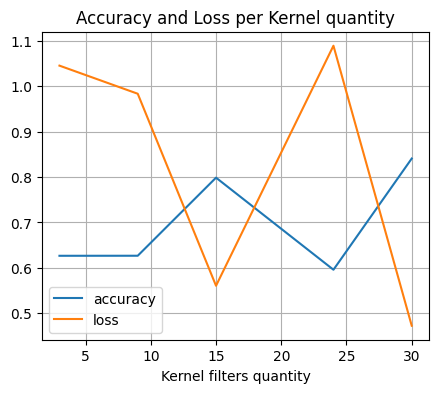

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 4) )

ax1.plot(list_qtd_kernel, list_2_acc, label='accuracy')
ax1.plot(list_qtd_kernel, list_2_loss, label='loss')
ax1.legend(loc='best')
ax1.set_title('Accuracy and Loss per Kernel quantity')
ax1.set_ylabel('')
ax1.set_xlabel('Kernel filters quantity')
ax1.grid()

# Save the plot
plt.savefig(f'{path_drive}/CNN/fig_kernel_vs_accuracy_and_loss.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/CNN/fig_kernel_vs_accuracy_and_loss.png', format='png', bbox_inches="tight")
plt.show()


### Dimension of kernel

kernel=(3,3), 30 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 23s 100ms/step - loss: 10.3515 - accuracy: 0.3467 - val_loss: 1.2564 - val_accuracy: 0.6221
Epoch 2/15
187/187 [==============================] - 17s 89ms/step - loss: 1.2012 - accuracy: 0.5986 - val_loss: 0.8656 - val_accuracy: 0.7068
Epoch 3/15
187/187 [==============================] - 7s 40ms/step - loss: 0.9182 - accuracy: 0.6742 - val_loss: 0.6755 - val_accuracy: 0.7482
Epoch 4/15
187/187 [==============================] - 10s 52ms/step - loss: 0.8083 - accuracy: 0.7086 - val_loss: 0.6728 - val_accuracy: 0.7564
Epoch 5/15
187/187 [==============================] - 7s 38ms/step - loss: 0.7111 - accuracy: 0.7409 - val_loss: 0.4850 - val_accuracy: 0.8201
Epoch 6/15
187/187 [==============================] - 9s 50ms/step - loss: 0.6575 - accuracy: 0.7634 - val_loss: 0.5388

<ipython-input-17-3029b4949e56>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


kernel=(7,4), 30 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 11s 57ms/step - loss: 12.7852 - accuracy: 0.1867 - val_loss: 2.0444 - val_accuracy: 0.1945
Epoch 2/15
187/187 [==============================] - 9s 46ms/step - loss: 2.0035 - accuracy: 0.2060 - val_loss: 1.7333 - val_accuracy: 0.3201
Epoch 3/15
187/187 [==============================] - 11s 59ms/step - loss: 1.5960 - accuracy: 0.4092 - val_loss: 1.4059 - val_accuracy: 0.5532
Epoch 4/15
187/187 [==============================] - 9s 47ms/step - loss: 1.2900 - accuracy: 0.5287 - val_loss: 1.0195 - val_accuracy: 0.6449
Epoch 5/15
187/187 [==============================] - 10s 55ms/step - loss: 1.1565 - accuracy: 0.5834 - val_loss: 0.9822 - val_accuracy: 0.6682
Epoch 6/15
187/187 [==============================] - 11s 59ms/step - loss: 1.0614 - accuracy: 0.6194 - val_loss: 0.9085

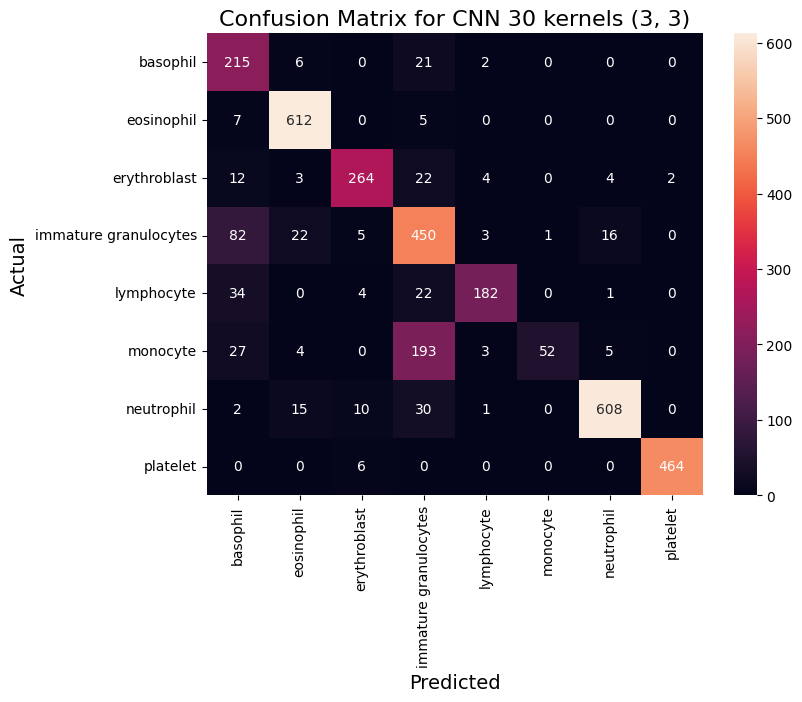

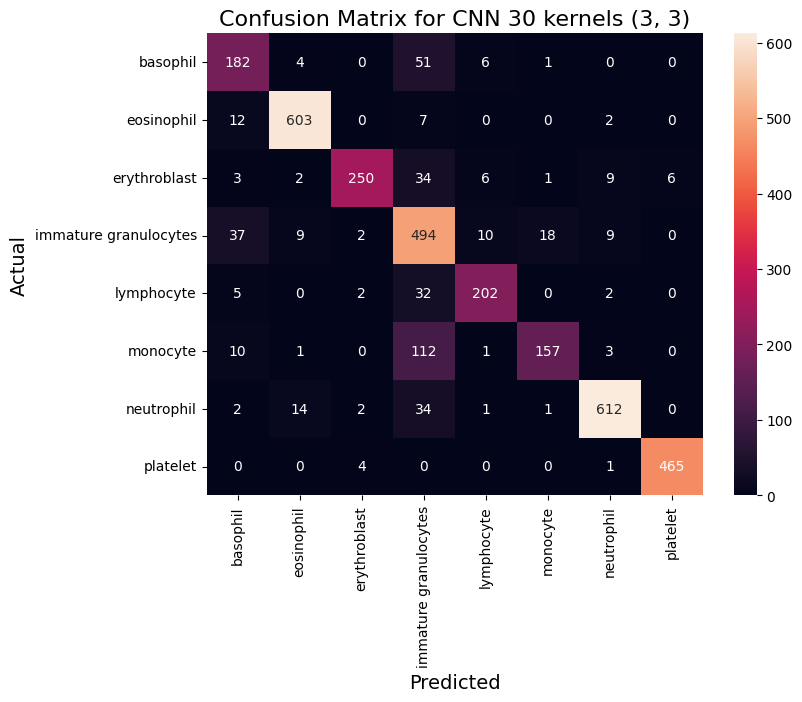

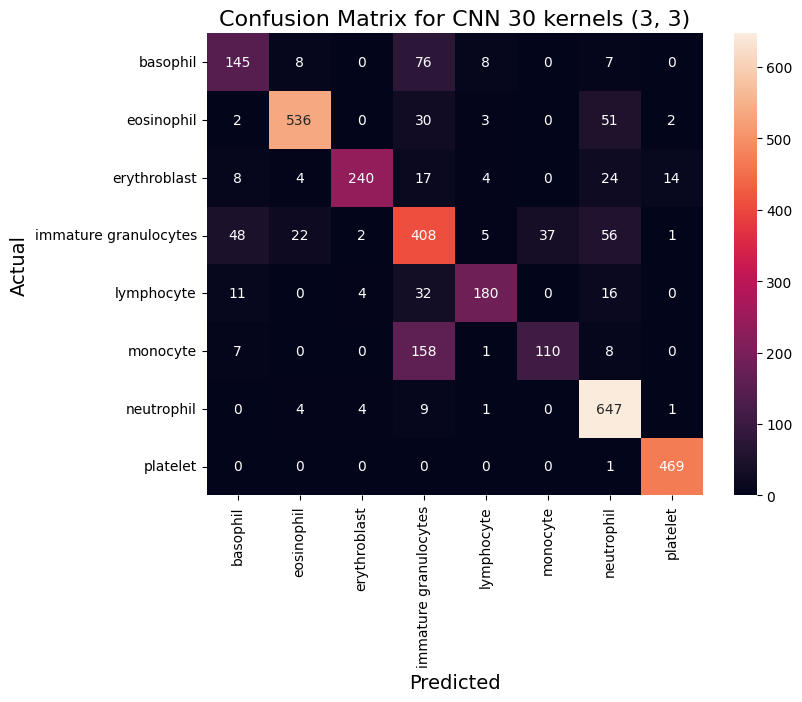

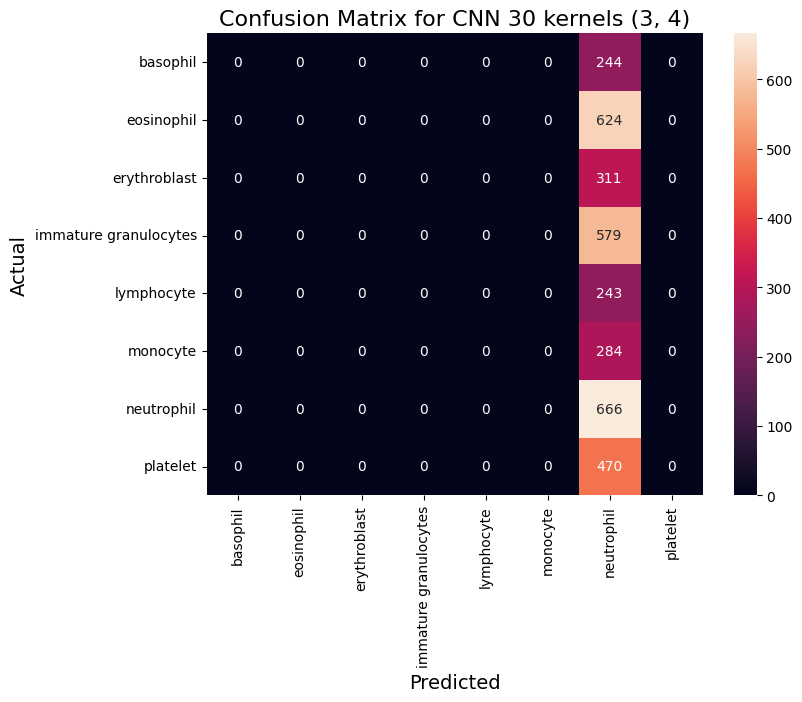

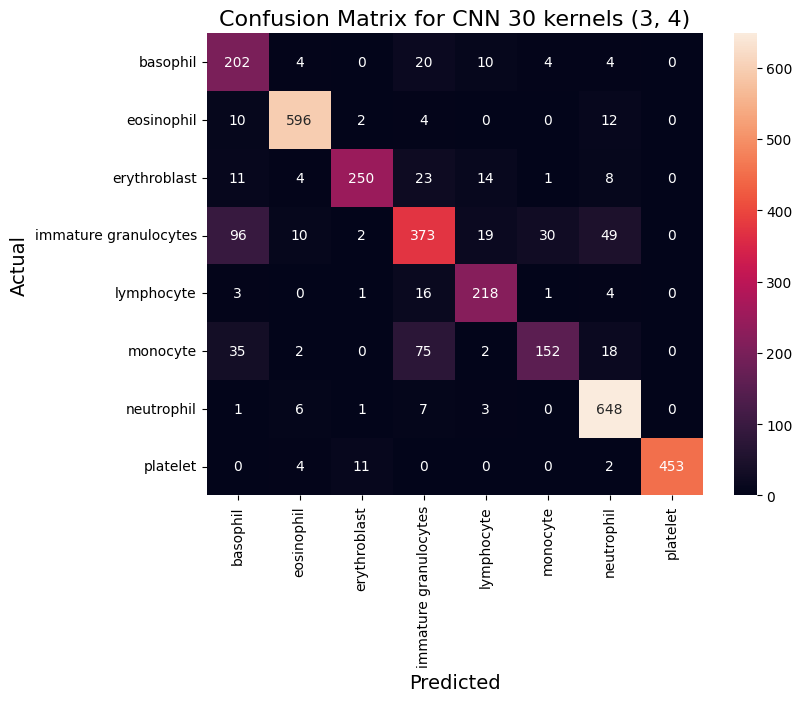

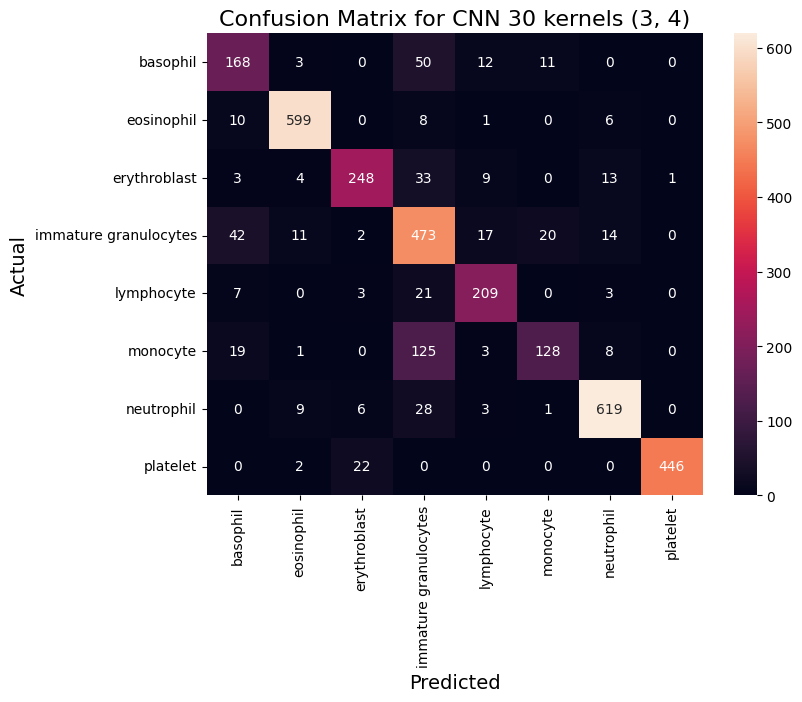

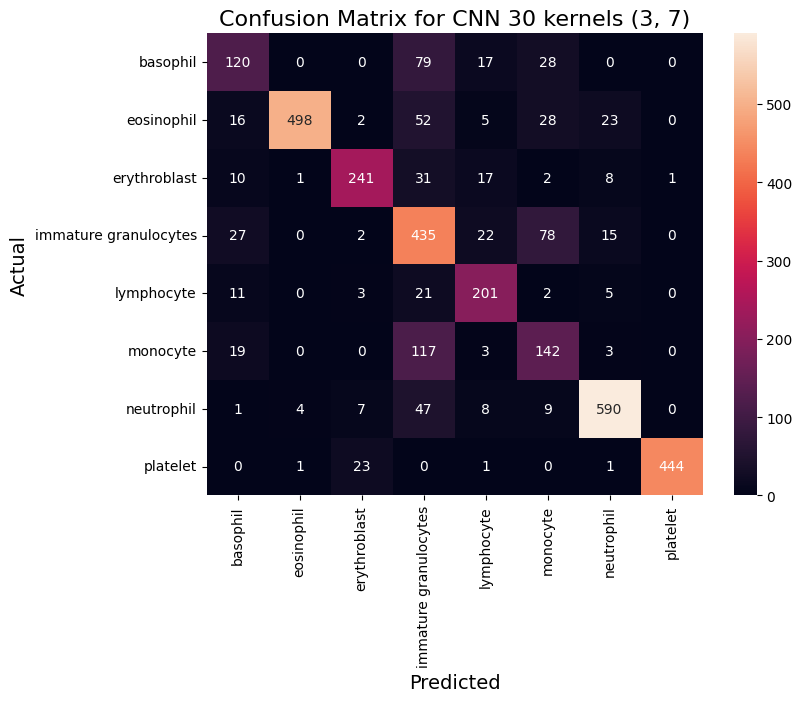

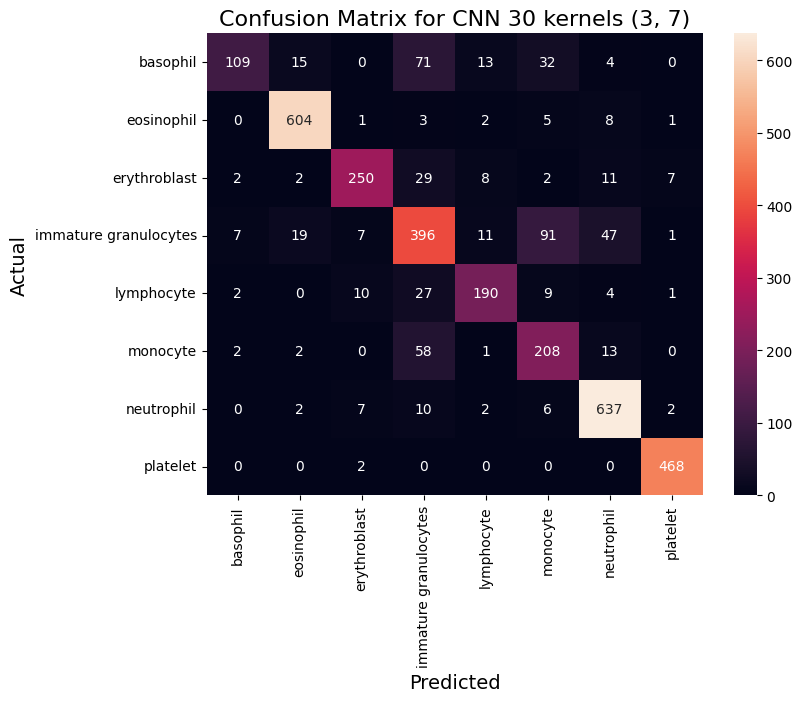

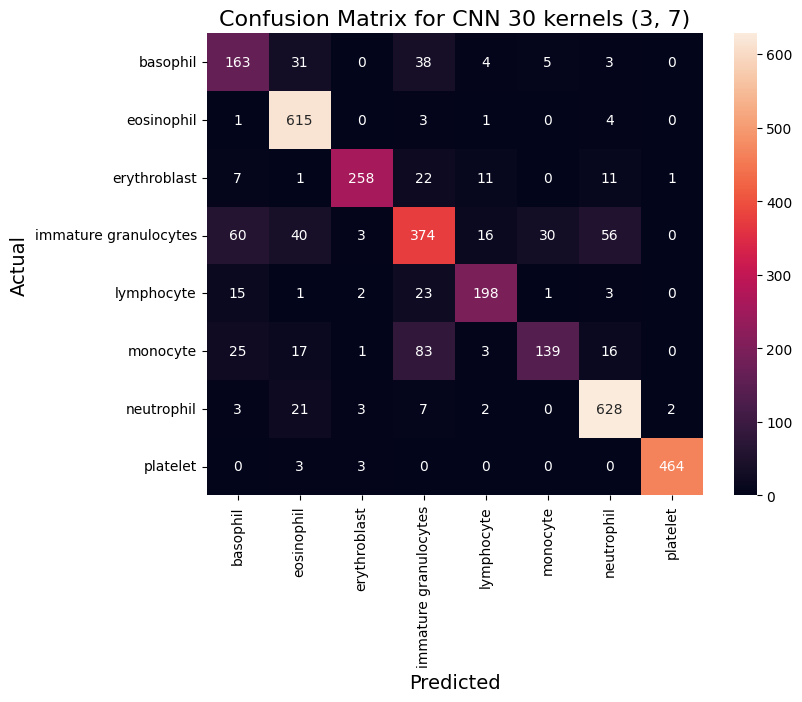

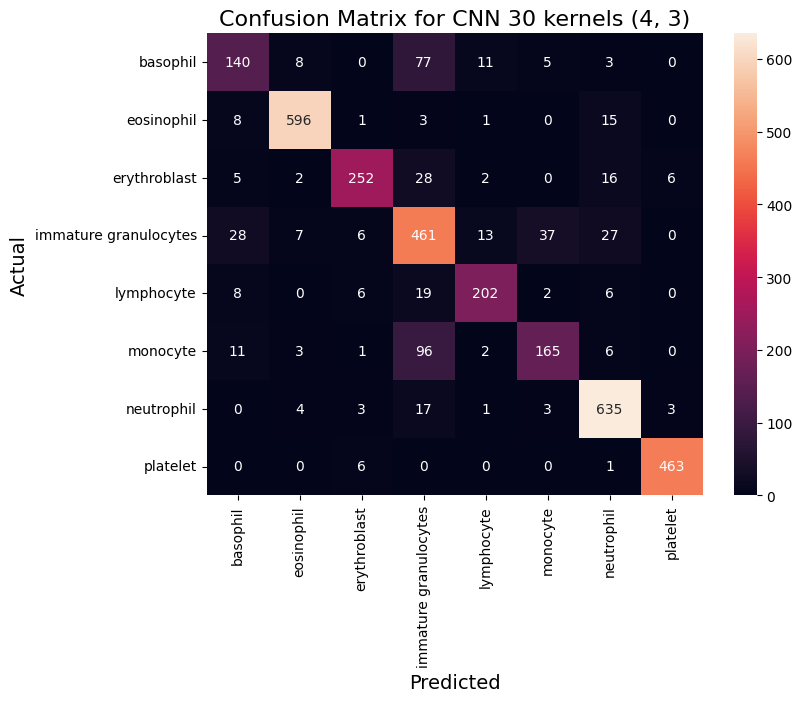

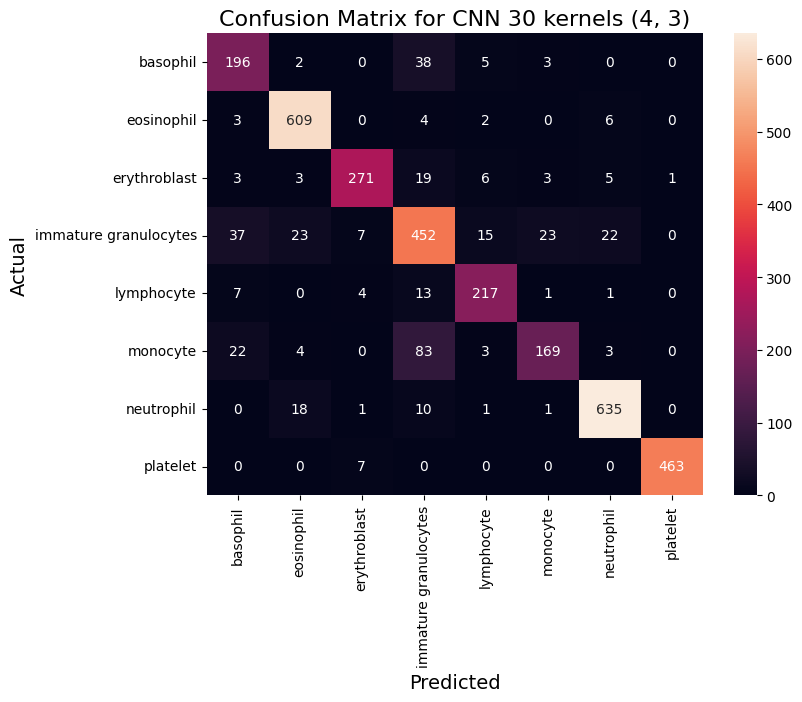

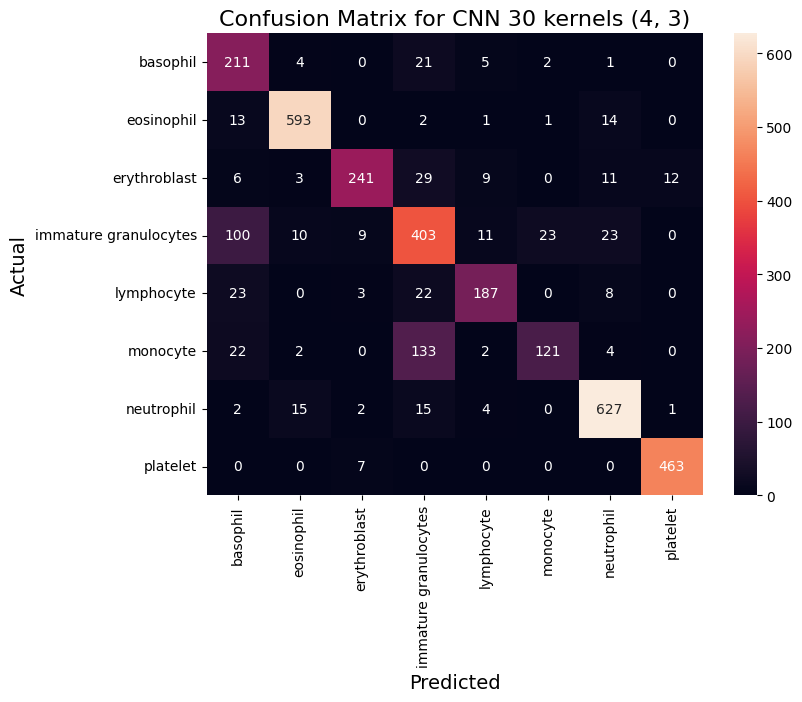

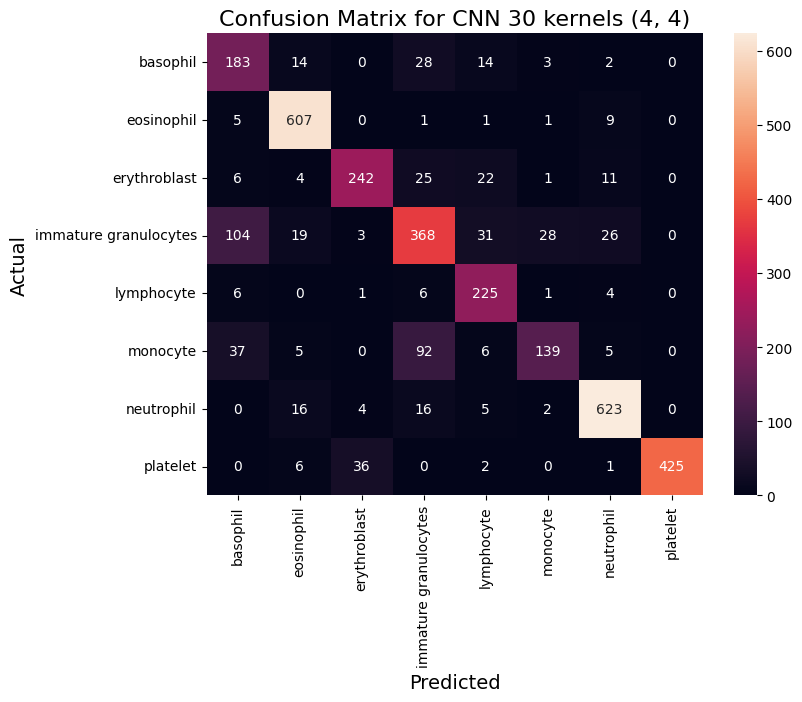

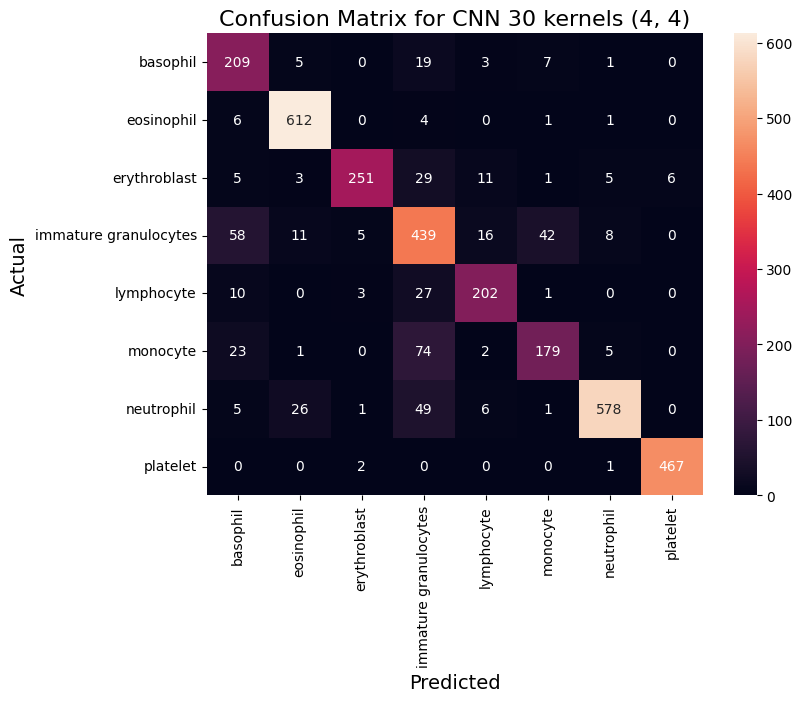

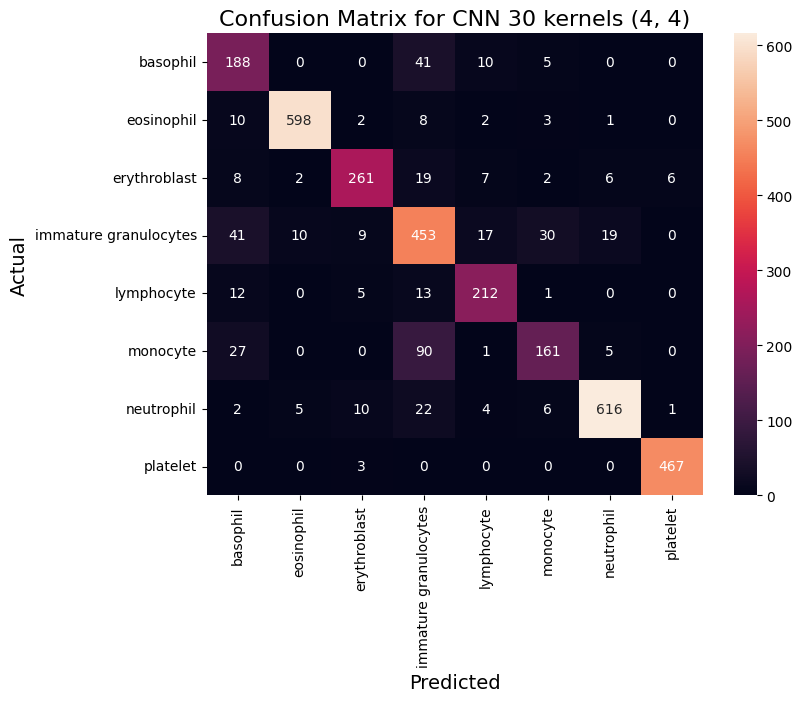

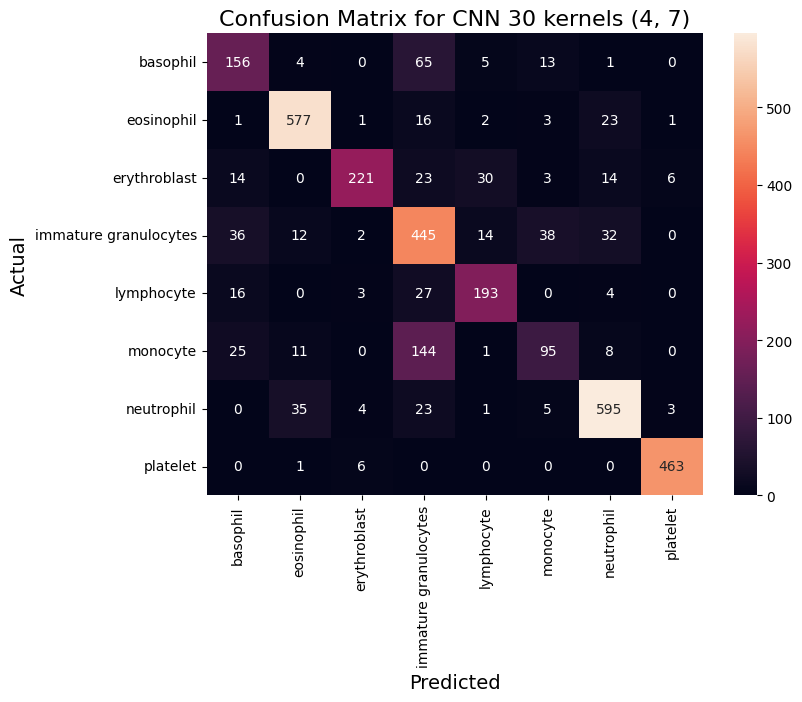

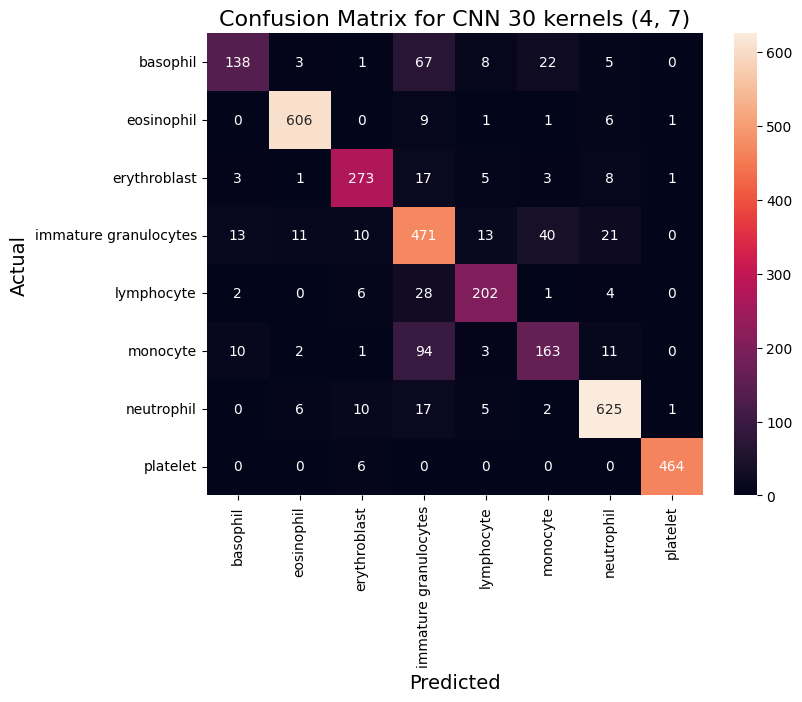

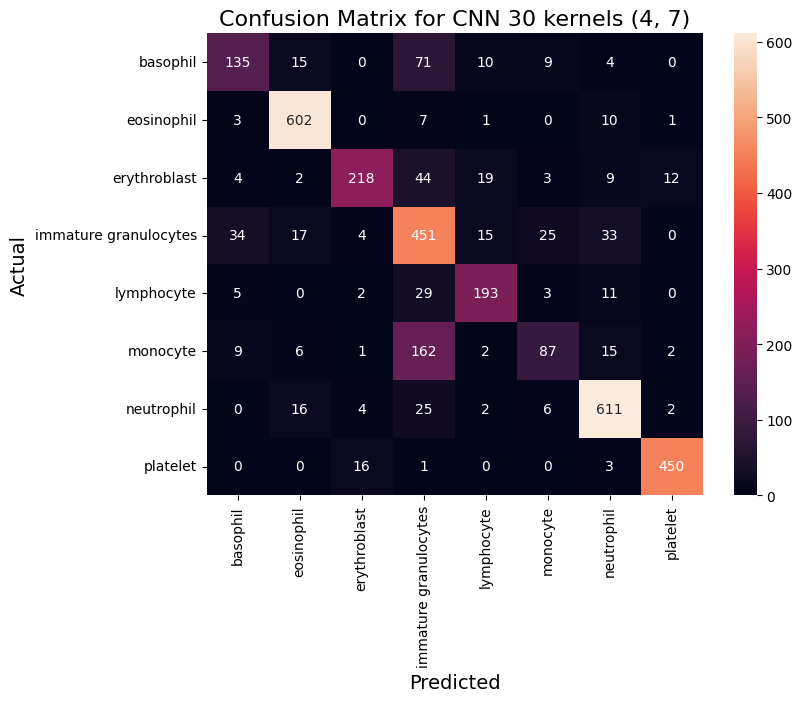

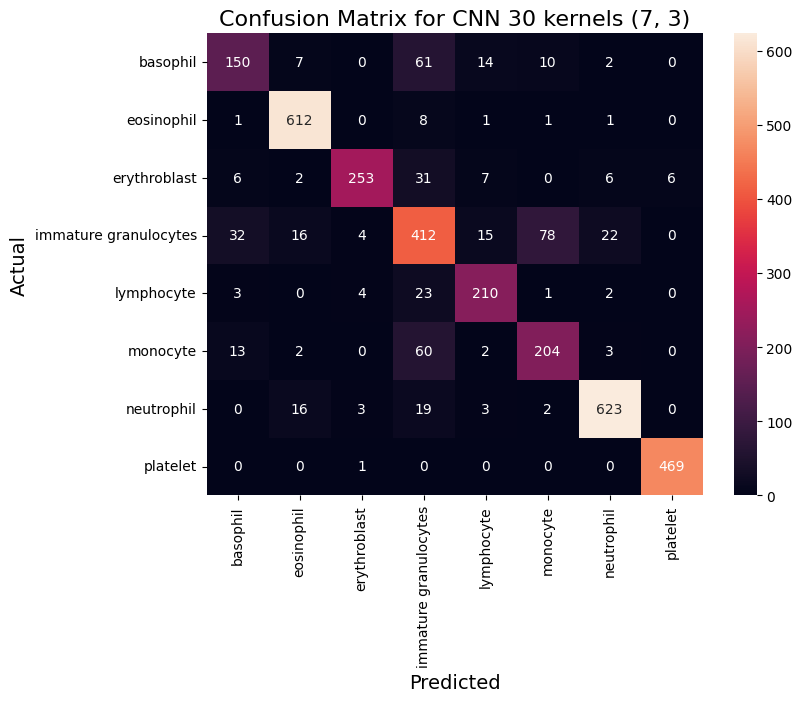

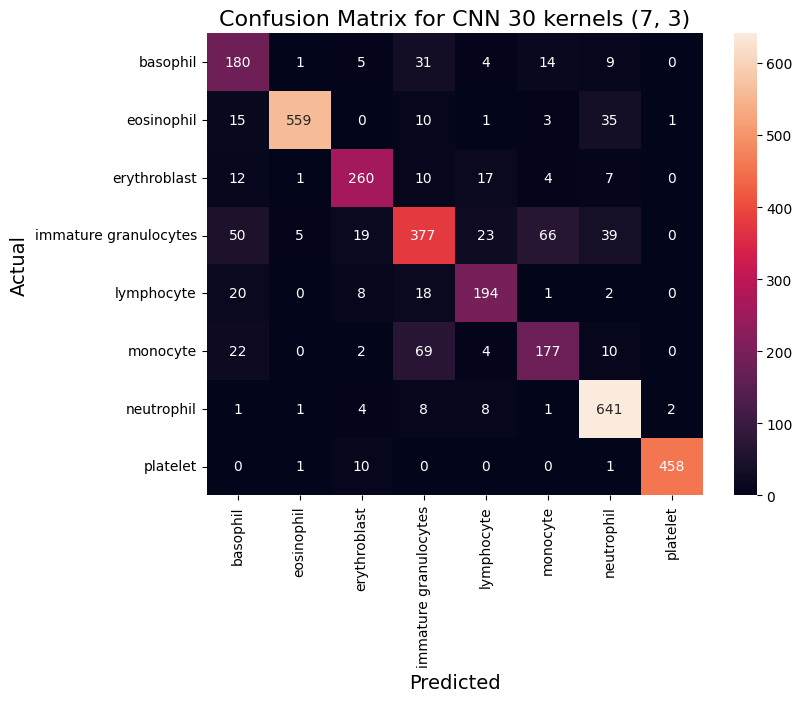

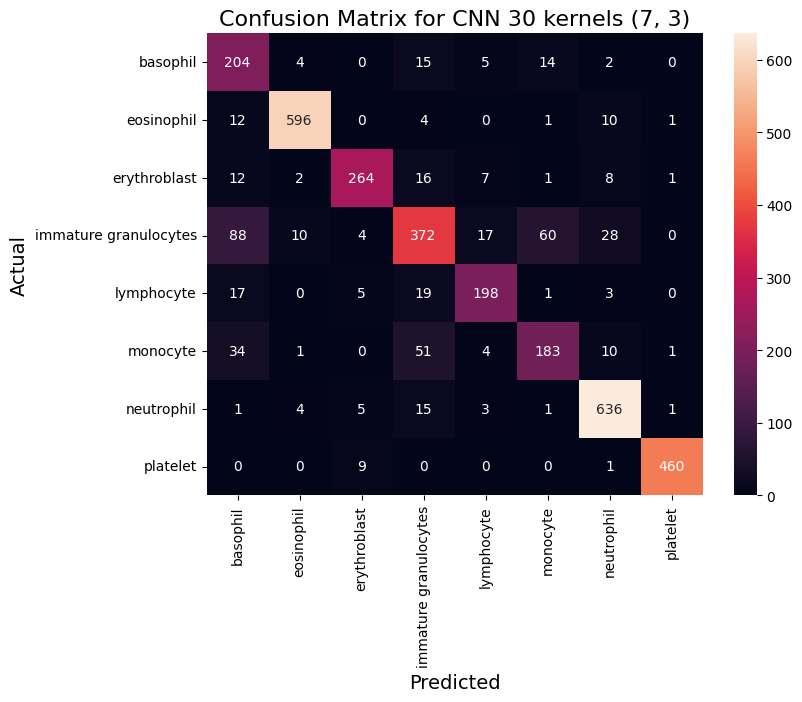

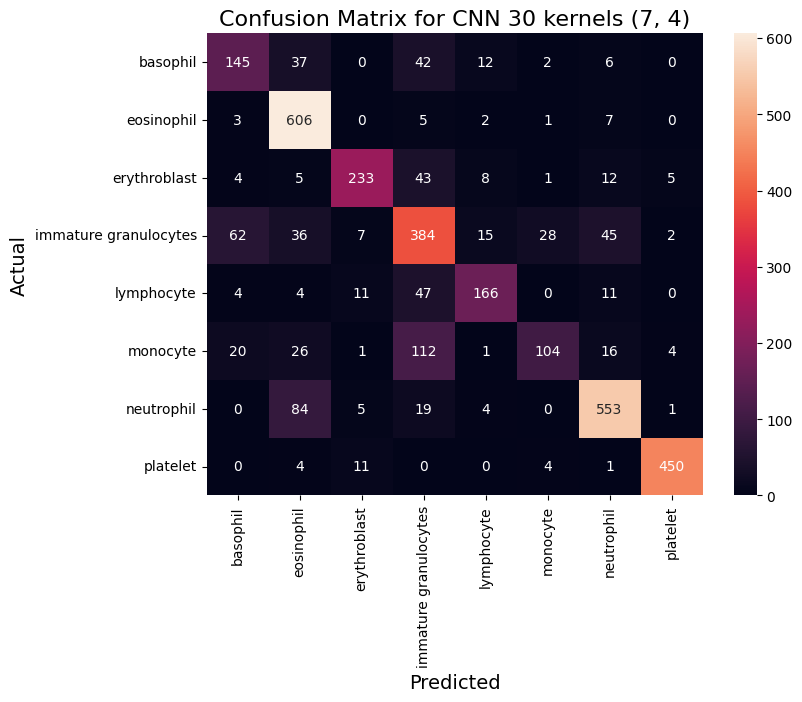

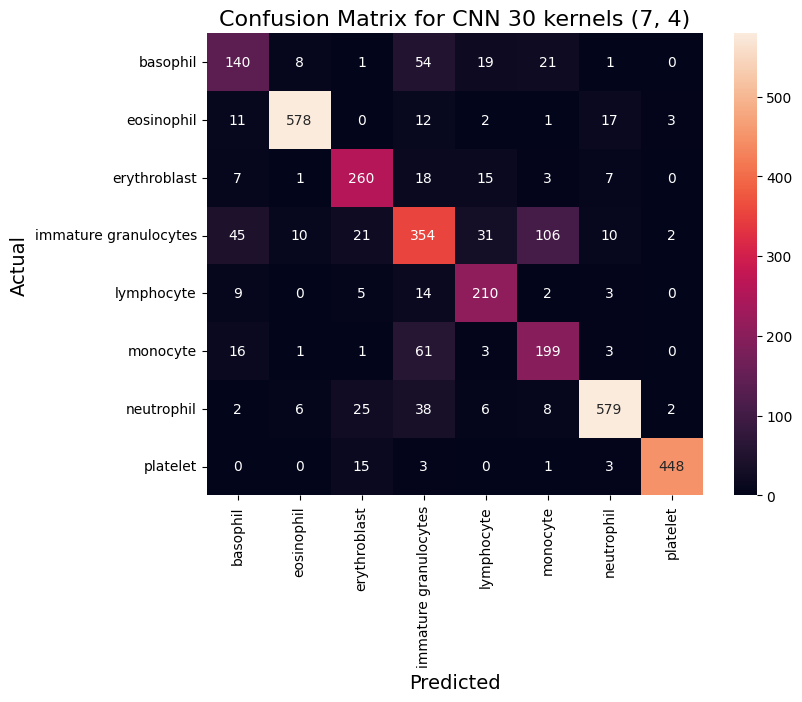

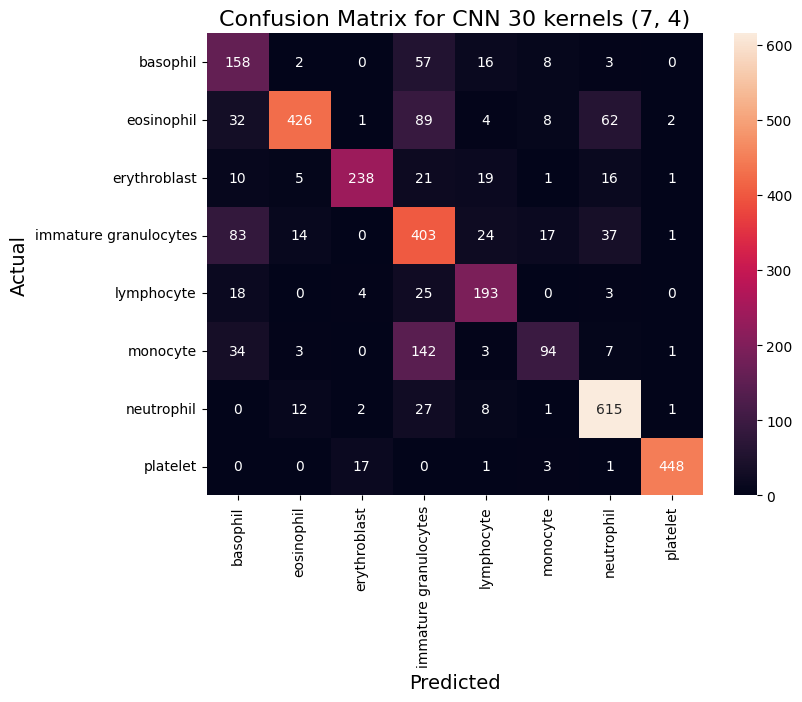

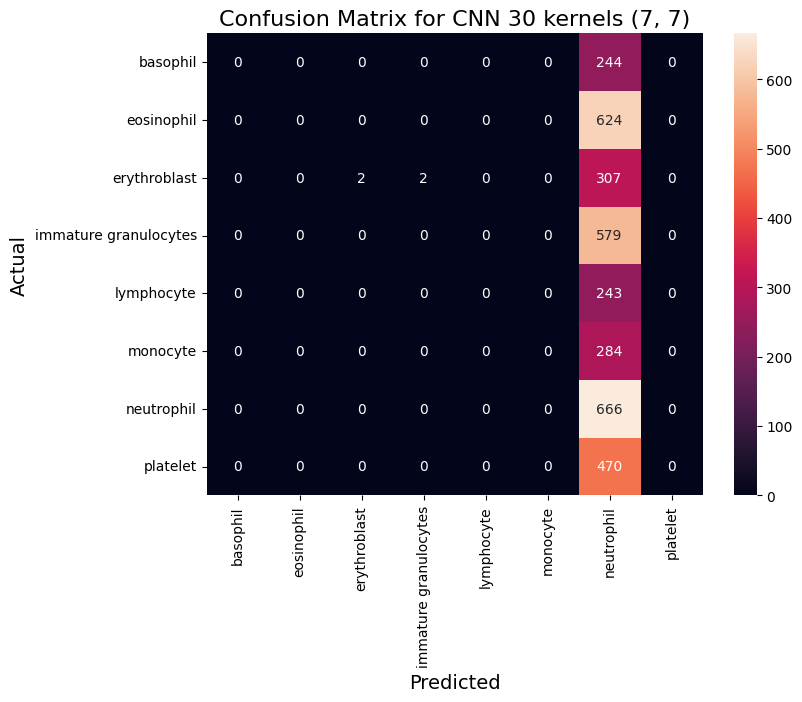

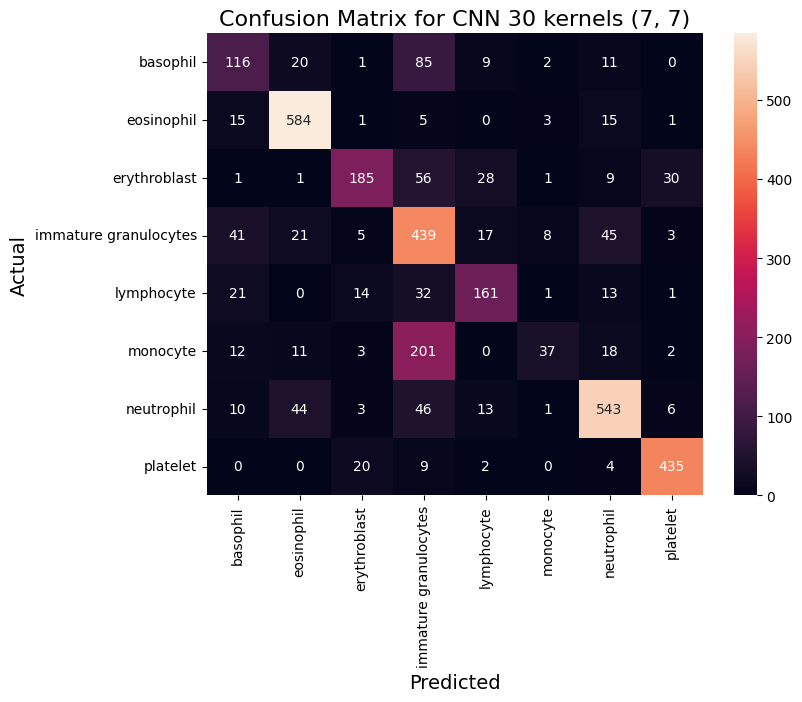

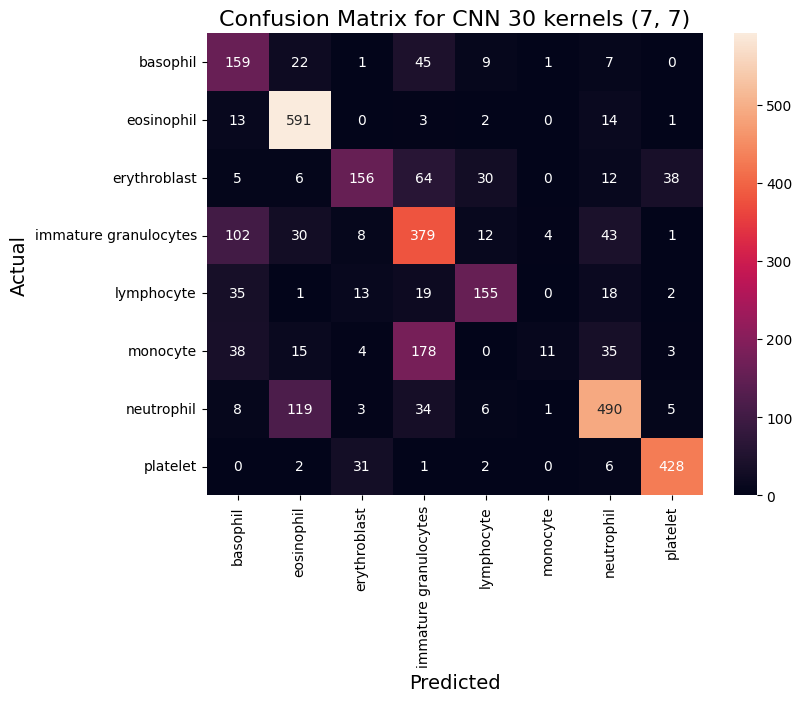

In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix

table_n = PrettyTable(["kernel height", "kernel widht", "qtd kernel", "loss", "accuracy", "n"])
table_avg = PrettyTable(["kernel height", "kernel widht", "qtd kernel", "loss", "accuracy", "n"])

listLayers = [1024]
listEpochs= [15]
list_height= [3, 4, 7]
list_width= [3, 4, 7]
list_qtd_kernel= [30]

list_2_acc = []
list_2_loss = []
list_2_ret = []
list_2_ret_model = []
list_2_ret_hist = []
list_2_cm = []          ## confusion matrix

# _, _m, hist = setup_MLP_model(1024, 0, 32, 30, 1, "MLP", 'sparse_categorical_crossentropy')

for l in listLayers:
  for e in listEpochs:
    for h in list_height:
      for w in list_width:
        for k in list_qtd_kernel:
          lossSum = 0
          accuracySum = 0
          for n in range(0,3,1):            ### apply to get the average of three interations
            ret, ret_model, ret_hist = setup_CNN_model(units=l, drop_out=0, batch_size=64, epochs=e, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=k, height_k=h, width_k=w, activation='relu')
            lossSum += ret[0]
            accuracySum += ret[1]

            table_n.add_row([h, w, k, ret[0], ret[1], n])

            list_2_ret_model.append(ret_model)
            list_2_ret_hist.append(ret_hist)
            list_2_ret.append(ret)

            cm2=confusion_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten())
            list_2_cm.append(cm2)
            plot_conf_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten(),
                             f"CNN {k} kernels ({h}, {w})", show_plot=False, cm=cm2,
                             details=f"_units_{l}_epoch_{e}_n_test_{n}_epoch_{e}_kernel_{k}_h_{h}_w_{w}", path_compl="ConfMatrix/KernelDimension")

          list_2_acc.append(accuracySum/3)
          list_2_loss.append(lossSum/3)

          table_avg.add_row([h, w, k, lossSum/3, accuracySum/3, "avg"])

with open(f'{path_drive}/CNN/ConfMatrix/comparison_kernels_dimension.csv', 'w', newline='') as f_output:
  f_output.write(table_n.get_csv_string())

with open(f'{path_drive}/CNN/ConfMatrix/comparison_kernels_dimension_avg.csv', 'w', newline='') as f_output:
  f_output.write(table_avg.get_csv_string())


In [ ]:
print(table_n)

print(table_avg)

+---------------+--------------+------------+---------------------+---------------------+---+
| kernel height | kernel widht | qtd kernel |         loss        |       accuracy      | n |
+---------------+--------------+------------+---------------------+---------------------+---+
|       3       |      3       |     30     |  0.4907829463481903 |  0.8322128057479858 | 0 |
|       3       |      3       |     30     |  0.3919088840484619 |  0.8667056560516357 | 1 |
|       3       |      3       |     30     |  0.5766850113868713 |  0.7994738221168518 | 2 |
|       3       |      4       |     30     |  2.003082752227783  | 0.19467991590499878 | 0 |
|       3       |      4       |     30     | 0.46770212054252625 |  0.8453668355941772 | 1 |
|       3       |      4       |     30     | 0.44636014103889465 |  0.8447822332382202 | 2 |
|       3       |      7       |     30     |  0.6192071437835693 |  0.7807658314704895 | 0 |
|       3       |      7       |     30     | 0.489268064498

### Plot para batch por epoca


In [ ]:
df = pd.read_csv(f'{path_drive}/CNN/ConfMatrix/comparison_layers_epochs_avg')
df

Unit  epochs      loss  accuracy    n
0   512       5  1.605201  0.361103  avg
1   512      15  1.079911  0.589399  avg
2  1024       5  2.005040  0.194680  avg
3  1024      15  0.493165  0.832700  avg
4  2048       5  1.718352  0.314236  avg
5  2048      15  1.537346  0.388775  avg
6  3096       5  1.391352  0.451525  avg
7  3096      15  1.017590  0.602845  avg

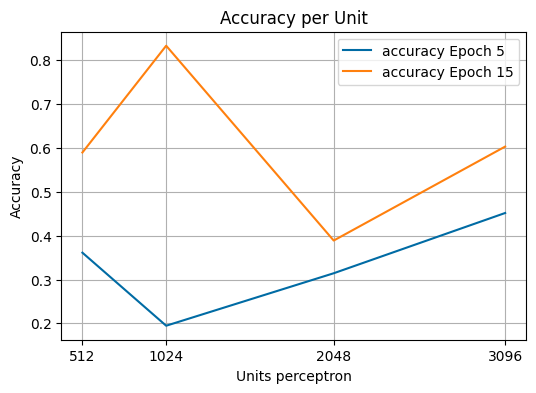

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

# Create a figure and axes
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 4))
fig.subplots_adjust(hspace=0.25)


ax1.plot(df[df['epochs'] == 5]['Unit'], df[df['epochs'] == 5]['accuracy'], label='accuracy Epoch 5')
ax1.plot(df[df['epochs'] == 15]['Unit'], df[df['epochs'] == 15]['accuracy'], label='accuracy Epoch 15')
ax1.legend(loc='best')
ax1.set_xticks(df[df['epochs'] == 15]['Unit'])
ax1.set_title('Accuracy per Unit')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Units perceptron')
ax1.grid()

plt.savefig(f'{path_drive}/MLP/fig_comparison_layers_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/MLP/fig_comparison_layers_epochs.png', format='png', bbox_inches="tight")
plt.show()


### Plot Accuracy vs Dimension of Kernel

   kernel height  kernel widht  qtd kernel      loss  accuracy    n
0              3             3          30  0.486459  0.832797  avg
1              3             4          30  0.972382  0.628276  avg
2              3             7          30  0.532102  0.815746  avg
3              4             3          30  0.421317  0.854721  avg
4              4             4          30  0.468927  0.848193  avg
5              4             7          30  0.537612  0.821787  avg
6              7             3          30  0.454842  0.846926  avg
7              7             4          30  0.635355  0.777940  avg
8              7             7          30  1.205629  0.539511  avg
['', 'K(3, 3)', 'K(3, 4)', 'K(3, 7)', 'K(4, 3)', 'K(4, 4)', 'K(4, 7)', 'K(7, 3)', 'K(7, 4)', 'K(7, 7)']


<ipython-input-5-7631430485e8>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=label_list)


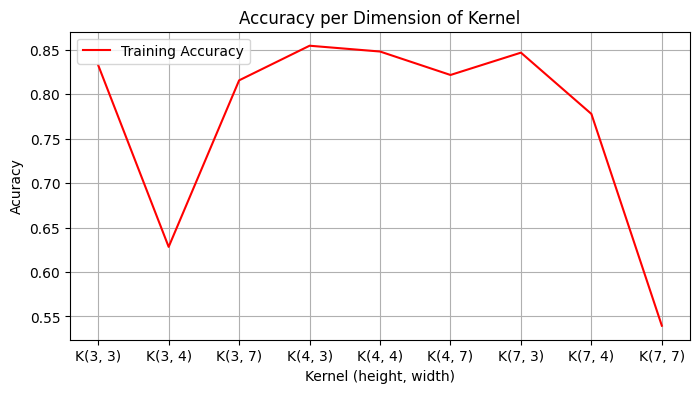

In [5]:
df= pd.read_csv(f'{path_drive}/CNN/ConfMatrix/comparison_kernels_dimension_avg.csv')
print(df)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

label_list = [""]
for h in [3, 4, 7]:
  for w in [3, 4, 7]:
    label_list.append(f'K({h}, {w})')
    # ax.plot(df[df['kernel height'] == h][df['kernel widht'] == w]['qtd kernel'], df[df['kernel height'] == h][df['kernel widht'] == w]['accuracy'], label=f'({h}, {w})')
print(label_list)

# ax.plot(df['optimizer algorithm'], df['loss'], color='b', label='Training Loss')
ax.plot(range(0,9,1), df['accuracy'], color='r', label='Training Accuracy')
ax.legend(loc='best')
ax.set_xticklabels(labels=label_list)
ax.set_title('Accuracy per Dimension of Kernel')
ax.set_ylabel('Acuracy')
ax.set_xlabel('Kernel (height, width)')
ax.grid()

plt.savefig(f'{path_drive}/CNN/fig_comparison_kernel_dimension.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/CNN/fig_comparison_kernel_dimension.png', format='png', bbox_inches="tight")

plt.show()

## Final hyperparamenters - 15 Kernels (3x3)

In [12]:
ret_final, ret_model_final, ret_hist_final = setup_CNN_model(1024, 0, 64, 15, 1, "sparse_categorical_crossentropy", 15, 3, 3, 'relu')


kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 [==============================] - 8s 39ms/step - loss: 8.8085 - accuracy: 0.2066 - val_loss: 1.9428 - val_accuracy: 0.3125
Epoch 2/15
187/187 [==============================] - 9s 49ms/step - loss: 1.8500 - accuracy: 0.3368 - val_loss: 1.6187 - val_accuracy: 0.4451
Epoch 3/15
187/187 [==============================] - 13s 70ms/step - loss: 1.5882 - accuracy: 0.4265 - val_loss: 1.3338 - val_accuracy: 0.5339
Epoch 4/15
187/187 [==============================] - 12s 64ms/step - loss: 1.3393 - accuracy: 0.5037 - val_loss: 1.0357 - val_accuracy: 0.5835
Epoch 5/15
187/187 [==============================] - 8s 42ms/step - loss: 1.0564 - accuracy: 0.6006 - val_loss: 0.8548 - val_accuracy: 0.7056
Epoch 6/15
187/187 [==============================] - 7s 39ms/step - loss: 0.9070 - accuracy: 0.6597 - val_loss: 0.7403 - 

107/107 [==============================] - 1s 11ms/step
[[129   4   0  84  15  10   2   0]
 [  7 589   0   7   2   3  16   0]
 [  2   2 257  23   7   2   9   9]
 [ 14   5   3 422   9  90  36   0]
 [  1   0   6  38 188   1   9   0]
 [  1   0   1 101   2 174   5   0]
 [  0   1   3  18   1   3 640   0]
 [  0   0   5   0   0   0   1 464]]


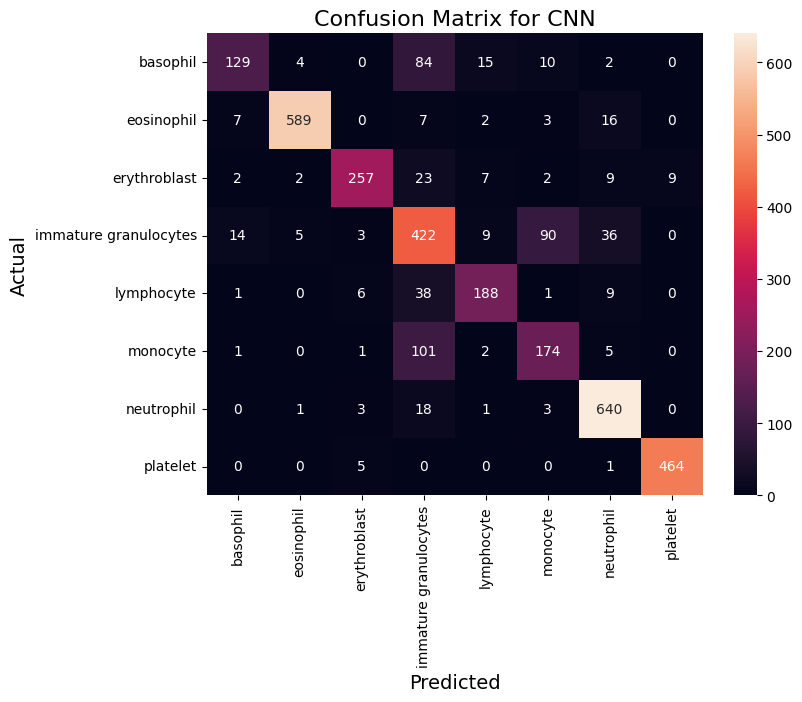

In [23]:
pred_mlp = ret_model_final.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "CNN", show_plot=False, cm=cm2, details="CNN_final_units_1024_batch_64_epoch_15_optimizer_Adam" )

In [15]:
report_class= classification_report(y_test.flatten(), np.argmax(ret_model_final.predict(X_test), axis = 1).flatten())
print(report_class)

107/107 [==============================] - 2s 20ms/step
              precision    recall  f1-score   support

           0       0.84      0.53      0.65       244
           1       0.98      0.94      0.96       624
           2       0.93      0.83      0.88       311
           3       0.61      0.73      0.66       579
           4       0.84      0.77      0.81       243
           5       0.61      0.61      0.61       284
           6       0.89      0.96      0.92       666
           7       0.98      0.99      0.98       470

    accuracy                           0.84      3421
   macro avg       0.84      0.80      0.81      3421
weighted avg       0.85      0.84      0.84      3421



In [17]:
### Block used to evaluate the not wrong predictions individually
subset_y_pred = ret_model_final.predict(X_test)
subset_y_pred = np.argmax(subset_y_pred, axis = 1).flatten()

difs_list = subset_y_pred - y_test.flatten()
difs_list = np.where(difs_list != 0)[0]
print(difs_list)

subset_x_test = []
subset_y_test = []
for i in range(0, 6, 1):
  subset_x_test.append( X_test[difs_list[i]] )
  subset_y_test.append( y_test.flatten()[difs_list[i]] )

print(subset_y_pred)
print(subset_y_test)

107/107 [==============================] - 1s 11ms/step
[   0    2    4    7    9   14   19   23   33   35   36   37   50   53
   54   65   71   77   88  101  102  103  105  109  112  118  120  130
  131  132  133  145  146  148  173  174  179  187  208  209  217  228
  229  232  233  238  243  249  250  266  275  281  283  286  289  294
  320  333  335  336  337  340  357  362  370  371  372  379  382  396
  412  419  422  428  430  432  438  441  449  472  476  480  481  493
  496  500  516  517  529  530  531  534  564  571  575  576  578  593
  598  602  608  613  616  630  635  641  645  658  667  670  674  683
  692  699  700  705  706  708  714  715  733  740  742  744  747  750
  761  766  780  786  794  802  805  809  814  817  823  826  832  836
  838  839  848  864  873  879  882  884  888  890  894  896  902  905
  906  912  917  928  939  942  944  949  950  952  957  963  967  981
  983  984  985  987  994  998 1001 1004 1013 1016 1017 1018 1021 1027
 1054 1055 1056 1059 

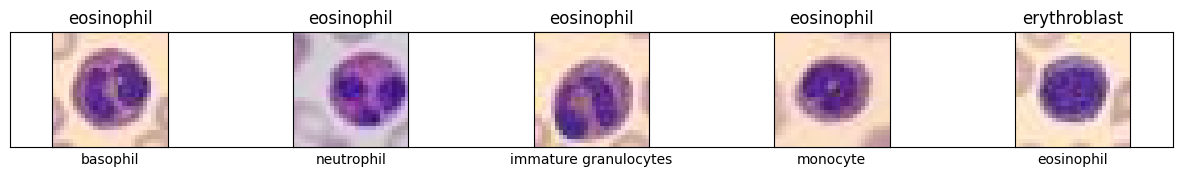

In [21]:
#  Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(15, 1.5))
plt.xticks([])
plt.yticks([])

for i in range(1, 2, 1):
    for j in range(1, 6, 1):
        fig.add_subplot(1, 5, j)
        plt.imshow(X_test[difs_list[j]], interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        plt.title(f'{dict_classes[str(subset_y_test[j])]}')
        plt.xlabel(f'{dict_classes[str(subset_y_pred[j])]}')
# plt.set_axis_off()
plt.savefig(f'{path_drive}/CNN/fig_test_samples_images_15_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/CNN/fig_test_samples_images_15_epochs.png', format='png', bbox_inches="tight")
plt.show()

## Final hyperparamenters - 15 Kernels (3x3) -- 100epochs

In [24]:
ret_final2, ret_model_final2, ret_hist_final2 = setup_CNN_model(1024, 0, 64, 100, 1, "sparse_categorical_crossentropy", 15, 3, 3, 'relu')


kernel=(3,3), 15 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=100
Epoch 1/100
187/187 [==============================] - 16s 68ms/step - loss: 8.6735 - accuracy: 0.1838 - val_loss: 2.0461 - val_accuracy: 0.1945
Epoch 2/100
187/187 [==============================] - 10s 52ms/step - loss: 2.0356 - accuracy: 0.1947 - val_loss: 2.0237 - val_accuracy: 0.1945
Epoch 3/100
187/187 [==============================] - 11s 57ms/step - loss: 2.0178 - accuracy: 0.1951 - val_loss: 2.0124 - val_accuracy: 0.1945
Epoch 4/100
187/187 [==============================] - 11s 61ms/step - loss: 2.0100 - accuracy: 0.1953 - val_loss: 2.0072 - val_accuracy: 0.1945
Epoch 5/100
187/187 [==============================] - 10s 55ms/step - loss: 2.0050 - accuracy: 0.1953 - val_loss: 2.0050 - val_accuracy: 0.1945
Epoch 6/100
187/187 [==============================] - 13s 69ms/step - loss: 1.8420 - accuracy: 0.2839 - val_loss

107/107 [==============================] - 1s 6ms/step
[[199  10   1  18   2   7   7   0]
 [  2 609   1   2   0   0  10   0]
 [  1   0 281  15   5   1   5   3]
 [ 28  16   9 449   8  20  49   0]
 [  9   0   7  29 195   0   3   0]
 [  9   0   2  86   2 174  11   0]
 [  0   6   4   7   1   0 647   1]
 [  0   0   7   0   0   0   1 462]]


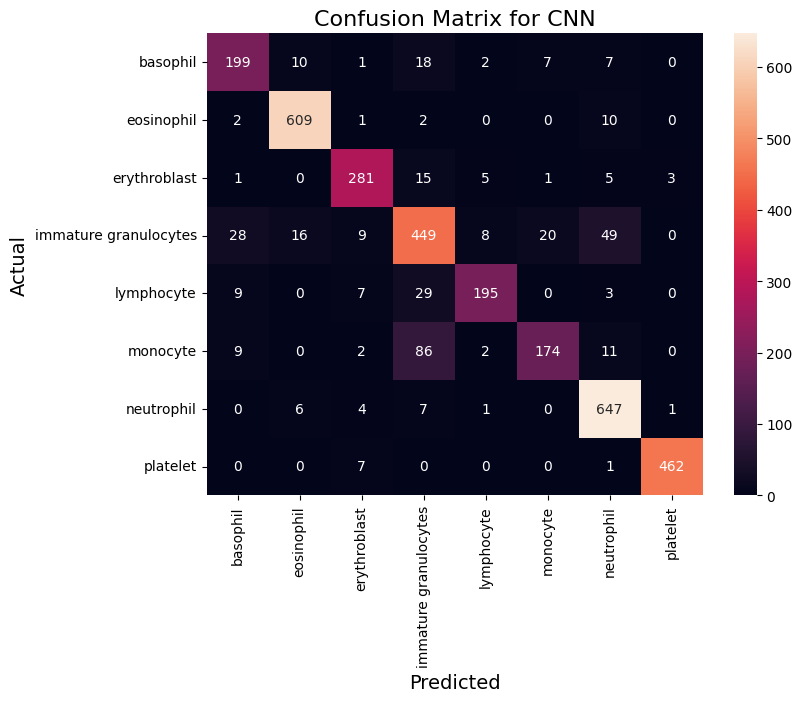

In [25]:
pred_mlp = ret_model_final2.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "CNN", show_plot=False, cm=cm2, details="CNN_final_units_1024_batch_64_epoch_100_optimizer_Adam" )

In [26]:
report_class2= classification_report(y_test.flatten(), np.argmax(ret_model_final2.predict(X_test), axis = 1).flatten())
print(report_class2)

107/107 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       244
           1       0.95      0.98      0.96       624
           2       0.90      0.90      0.90       311
           3       0.74      0.78      0.76       579
           4       0.92      0.80      0.86       243
           5       0.86      0.61      0.72       284
           6       0.88      0.97      0.92       666
           7       0.99      0.98      0.99       470

    accuracy                           0.88      3421
   macro avg       0.88      0.86      0.86      3421
weighted avg       0.88      0.88      0.88      3421



In [28]:
### Block used to evaluate the not wrong predictions individually
subset_y_pred2 = ret_model_final2.predict(X_test)
subset_y_pred2 = np.argmax(subset_y_pred2, axis = 1).flatten()

difs_list2 = subset_y_pred2 - y_test.flatten()
difs_list2 = np.where(difs_list2 != 0)[0]
print(difs_list2)

subset_x_test2 = []
subset_y_test2 = []
for i in range(0, 6, 1):
  subset_x_test2.append( X_test[difs_list2[i]] )
  subset_y_test2.append( y_test.flatten()[difs_list2[i]] )

print(subset_y_pred2)
print(subset_y_test2)

107/107 [==============================] - 1s 10ms/step
[   4   10   16   19   25   28   37   48   50   62   69   72   85   92
   93  101  102  105  112  116  118  120  122  132  133  145  146  148
  174  189  193  194  200  202  208  209  217  226  228  243  249  261
  268  271  281  289  294  320  333  340  346  362  370  372  379  385
  396  418  419  428  430  432  438  441  451  462  472  481  496  500
  509  516  518  529  535  552  571  576  579  583  589  593  615  642
  683  699  706  708  709  716  736  747  758  766  773  780  790  799
  802  803  805  809  814  817  821  823  826  832  838  839  849  852
  859  864  869  906  912  928  942  944  950  952  957  963  994 1001
 1013 1017 1027 1044 1055 1063 1068 1075 1093 1096 1112 1118 1125 1130
 1139 1146 1163 1168 1177 1180 1187 1188 1191 1195 1204 1211 1213 1214
 1220 1241 1242 1249 1263 1276 1316 1329 1332 1337 1339 1349 1360 1370
 1371 1377 1392 1399 1402 1413 1414 1416 1418 1421 1439 1446 1451 1455
 1459 1462 1496 1516 

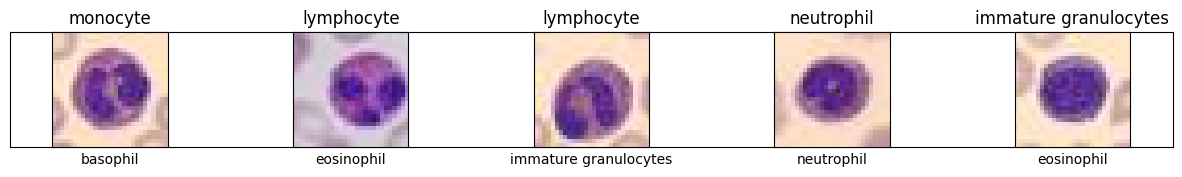

In [29]:
#  Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(15, 1.5))
plt.xticks([])
plt.yticks([])

for i in range(1, 2, 1):
    for j in range(1, 6, 1):
        fig.add_subplot(1, 5, j)
        plt.imshow(X_test[difs_list[j]], interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        plt.title(f'{dict_classes[str(subset_y_test2[j])]}')
        plt.xlabel(f'{dict_classes[str(subset_y_pred2[j])]}')
# plt.set_axis_off()
plt.savefig(f'{path_drive}/CNN/fig_test_samples_images_100_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/CNN/fig_test_samples_images_100_epochs.png', format='png', bbox_inches="tight")
plt.show()